<h1>Εξόρυξη Δεδομένων και Αλγόριθμοι Μάθησης</h1>
<h2>Εργαστηριακή Άσκηση Εαρινό Εξάμηνο 2023-2024</h2>
<h3>Στεργιόπουλος Γεώργιος<br>1083861<br>Τμήμα: ΗΜΤΥ</h3>

<h2>Ερώτημα 1</h2>
Σε αυτό το ερώτημα καλούμαστε να αναλύσουμε το σύνολο δεδομένων, να κάνουμε κατάλληλες γραφικές παραστάσεις και να παρατηρήσουμε τα στατιστικά.



<h3>Βάση Δεδομένων</h3>
Αρχικά λαμβάνουμε το σύνολο των δεδομένων μας σε 22 διαφορετικά αρχεία csv. Ενα αρχείο για κάθε χρήστη που συμμετείχε στις μετρήσεις. Για λόγους πρακτικούς, θα μετατρέψω αυτά τα csv αρχεία σε μια βάση δεδομένων (harth.db) η οποία στο schema της θα έχει 22 πίνακες με τα δεδομένα.

In [ ]:
import sqlite3

#testers (name of csv files) now they will be used as table names
testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')


Θα ορίσουμε μια συνάρτηση η οποία θα μας επιστρέφει το SQL Query 

In [ ]:
def dataOfTester(tester):
    return 'SELECT * FROM '+tester

<h3>Περιγραφή και έλεγχος Δεδομένων</h3>
Ας δούμε τώρα για κάθε tester τα δεδόμενα που έχουμε στην βάση δεδομένων μας.

In [ ]:
import pandas as pd
for i in testers:
    tester_df = pd.read_sql_query(dataOfTester(i), conn)  
    print("Info about tester: "+i)
    tester_df.info()

Info about tester: S006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408709 entries, 0 to 408708
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  408709 non-null  object 
 1   back_x     408709 non-null  float64
 2   back_y     408709 non-null  float64
 3   back_z     408709 non-null  float64
 4   thigh_x    408709 non-null  float64
 5   thigh_y    408709 non-null  float64
 6   thigh_z    408709 non-null  float64
 7   label      408709 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 24.9+ MB
Info about tester: S008
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418989 entries, 0 to 418988
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  418989 non-null  object 
 1   back_x     418989 non-null  float64
 2   back_y     418989 non-null  float64
 3   back_z     418989 non-null  float64
 4   thigh_x 

Παρατηρώντας τις παραπάνω πληροφορίες, βλέπουμε οτι στην βάση δεν έχουμε missing ή null values. Eπιπλέον είναι σαφές οτί για την εργασία αυτή χρειαζόμαστε απο κάθε tester τις εξής πληροφορίες:
<ul>
<li>1. timestamp: date and time of recorded sample</li>
<li>2. back_x: acceleration of back sensor in x-direction (down) in the unit g</li>
<li>3. back_y: acceleration of back sensor in y-direction (left) in the unit g</li>
<li>4. back_z: acceleration of back sensor in z-direction (forward) in the unit g</li>
<li>5. thigh_x: acceleration of thigh sensor in x-direction (down) in the unit g</li>
<li>6. thigh_y: acceleration of thigh sensor in y-direction (right) in the unit g</li>
<li>7. thigh_z: acceleration of thigh sensor in z-direction (backward) in the unit g</li>
<li>8. label: annotated activity code</li>
</ul>

Συνεπώς στους Testers S015 και S021 οπου υπάρχει το field index, μπορούμε να το κάνουμε drop καθώς δεν μας παρέχει κάποια χρήσιμη πληροφορία.
Επιπλέον στον tester S023 θα κάνουμε drop το field1, για τους ίδιους λόγους.

Μετά απο αυτές τις ενέργεις θα έχουμε πετύχει ομοιομορφία στα πεδία των δεδομένων μας και δεν θα έχουμε αχρείαστες πληροφορίες.

<h3>Δημιουργία ενός Dataframe με τα δεδομένα όλων των tester</h3>

In [ ]:
def createDataframe():
    df=pd.DataFrame()
    for i in testers:
        tester_df = pd.read_sql_query(dataOfTester(i), conn)
        if(i=='S015' or i=='S021'):
            tester_df=tester_df.drop(columns=['index'])
        if(i=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
        df=pd.concat([df,tester_df],ignore_index=True)
    return df

df=pd.DataFrame()
df=createDataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 394.4+ MB


<h3>Dataframe χωρίς Timestamp</h3>
Σε μερικές περιπτώσεις παρακάτω, η πληροφορία του timestamp δεν θα μας είναι χρήσιμη ως εκ τούτου ας δημιουργήσουμε ενα ελαφρύτερο Dataframe, κάνοντας drop το timestamp.

In [ ]:
df_notime=pd.DataFrame()
df_notime=df.drop(columns=['timestamp'])
df_notime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   back_x   float64
 1   back_y   float64
 2   back_z   float64
 3   thigh_x  float64
 4   thigh_y  float64
 5   thigh_z  float64
 6   label    int64  
dtypes: float64(6), int64(1)
memory usage: 345.1 MB


<h3>Πλήθος Data ανά activity</h3>
Ας υπολογίσουμε τώρα το σύνολο των δεδομένων για κάθε δραστηριότητα.

label
7      2902703
1      1197155
6       743480
8       428898
13      393963
2       291356
3       254839
4        76217
5        67253
14       55814
130      41785
140       7865
Name: count, dtype: int64


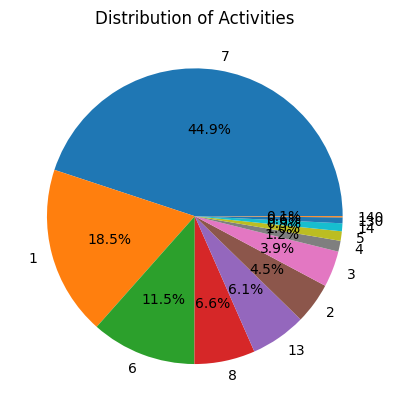

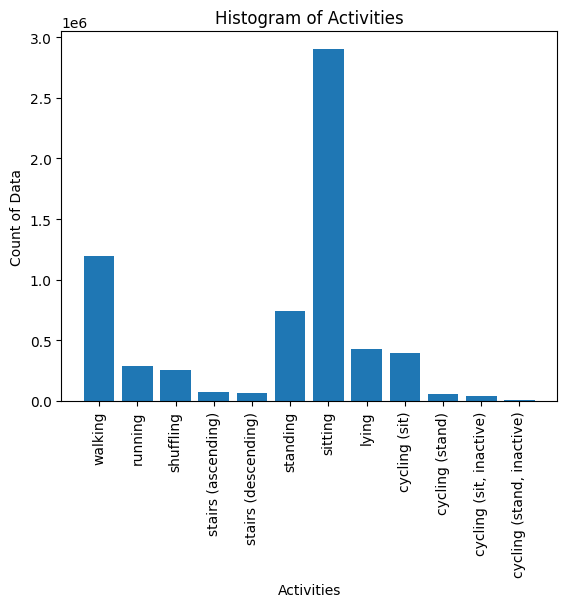

In [ ]:
from  matplotlib import pyplot as plt

activities=['1','2','3','4','5','6','7','8','13','14','130','140']

activities_names=['walking','running','shuffling','stairs (ascending)','stairs (descending)',\
                  'standing','sitting','lying','cycling (sit)','cycling (stand)',\
                    'cycling (sit, inactive)','cycling (stand, inactive)']

### ORDERED and Pie Chart###
activity_counts = df_notime['label'].value_counts()
print(activity_counts)
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Activities')
plt.show()

### HISTGRAM ###
count_activities=[]
for i in range(len(activities)):
    count_activities.append(len(df_notime[df_notime['label'] == int(activities[i])]))
plt.bar(activities_names, count_activities)
plt.xlabel('Activities')
plt.ylabel('Count of Data')
plt.title('Histogram of Activities')
plt.xticks(rotation=90)
plt.show()





<h3>Dataframes ανά δραστηριότητα</h3>
Ας δημιουργήσουμε τώρα μία λίστα η οποία θα περιέχει Dataframes για κάθε δραστηριότητα ξεχωριστά.

In [ ]:
def dfperActivity():
    df_list=[]
    for i in range(len(activities)):
        df_list.append(df_notime[df_notime['label'] == int(activities[i])])
    return df_list

df_per_activity=dfperActivity()


for i in range(len(activities)):
    print("Info about activity: "+activities_names[i],'\n',df_per_activity[i].describe().loc['mean':'std'])

Info about activity: walking 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.992566 -0.038755 -0.137808 -1.056683 -0.023477 -0.074345    1.0
std   0.311378  0.190476  0.287737  0.639900  0.536738  0.721997    0.0
Info about activity: running 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.965280 -0.076626 -0.259829 -1.246811 -0.164790 -0.140530    2.0
std   1.113858  0.407701  0.451772  1.438550  0.898353  1.381836    0.0
Info about activity: shuffling 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.982356 -0.022316 -0.031349 -0.974374  0.020759 -0.068220    3.0
std   0.106649  0.158300  0.208112  0.192159  0.226300  0.294548    0.0
Info about activity: stairs (ascending) 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.961095 -0.033405 -0.065052 -1.016784  0.013345 -0.006504    4.0
std   0.268016  0.170207  0.336750  0.496791  0.308519  0.455921    0.0

<h3>Ιστόγραμμα ανα δραστηριότητα/ανα αισθητήρα</h3>
Θα δημιουργήσουμε τώρα ένα ιστόγραμμα για κάθε αισθητήτα ανα δραστηρίοτητα.

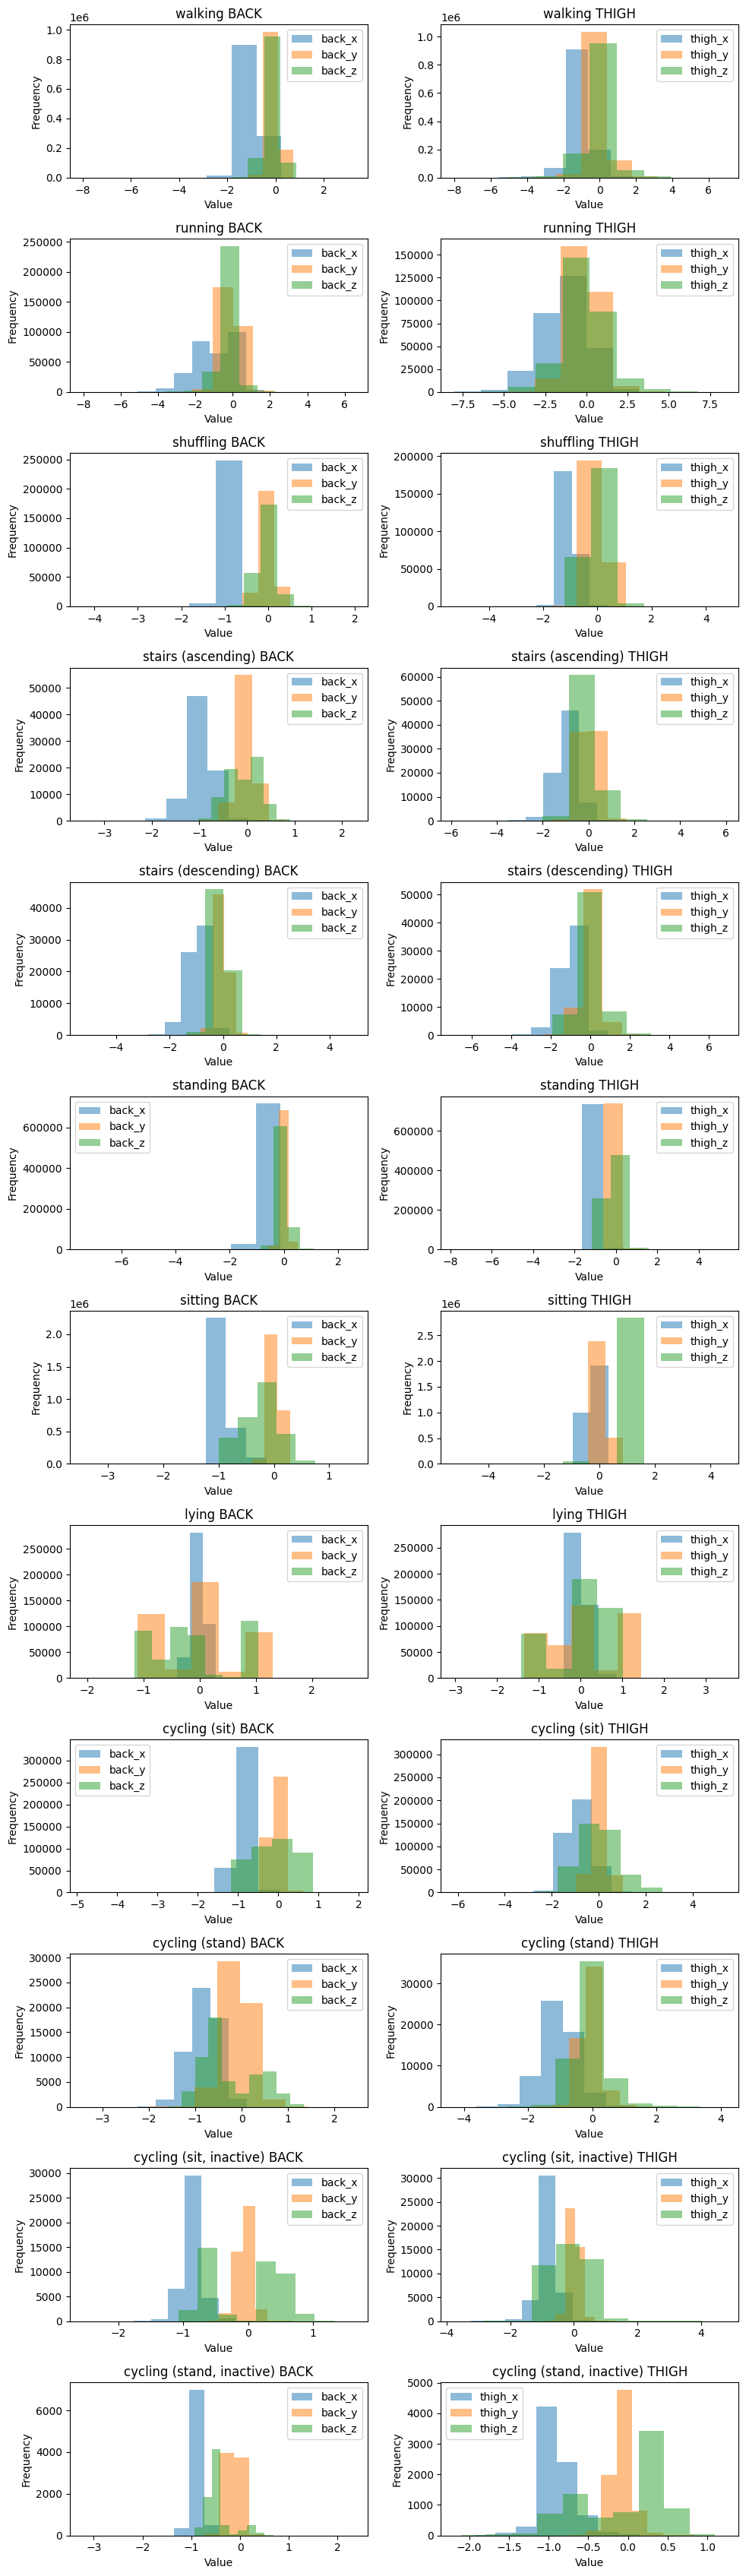

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 34))

for i in range(len(activities)):
    plt.subplot(12, 2, i*2+1)
    plt.hist(df_per_activity[i]['back_x'], alpha=0.5, label='back_x')
    plt.hist(df_per_activity[i]['back_y'], alpha=0.5, label='back_y')
    plt.hist(df_per_activity[i]['back_z'], alpha=0.5, label='back_z')
    plt.title(activities_names[i]+' BACK')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(12, 2, i*2+2)
    plt.hist(df_per_activity[i]['thigh_x'], alpha=0.5, label='thigh_x')
    plt.hist(df_per_activity[i]['thigh_y'], alpha=0.5, label='thigh_y')
    plt.hist(df_per_activity[i]['thigh_z'], alpha=0.5, label='thigh_z')
    plt.title(activities_names[i]+' THIGH')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h3>Ιστόγραμμα ανα μέτρηση ανα δραστηριότητα (έλεγχος κατανομών)</h3>
Θα παρουσιάσουμε 12 διαγράμματα 1 για κάθε δραστηριότητα έτσι ώστε να δούμε τι κατανομές ακολουθούν οι μετρήσεις. Θα δημιουργήσουμε ιστογράμματα τα οποία έχουν τις γραμμές mean και std, έτσι ώστε να γίνεται εύκολα αντιλληπτό.

walking


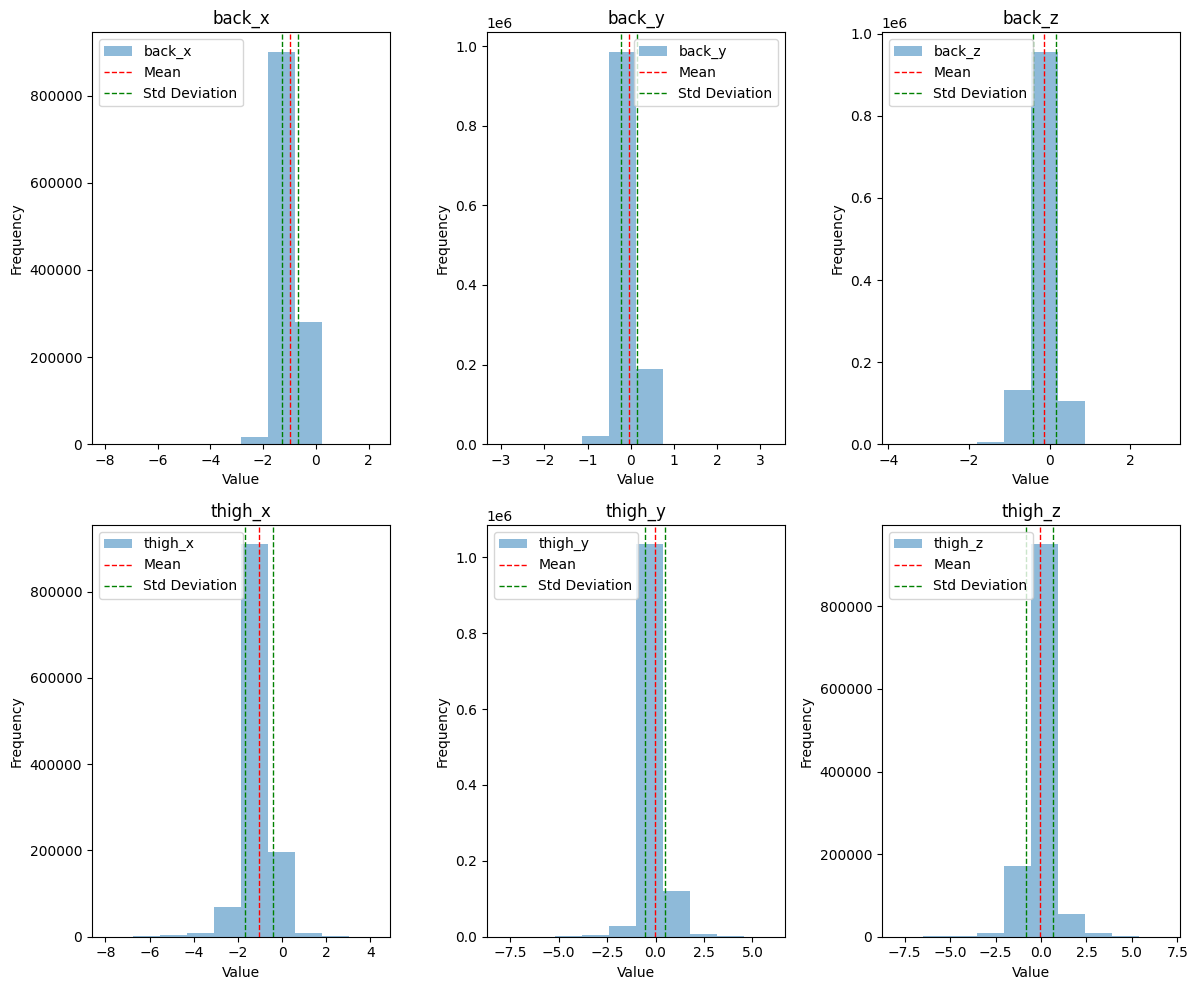

running


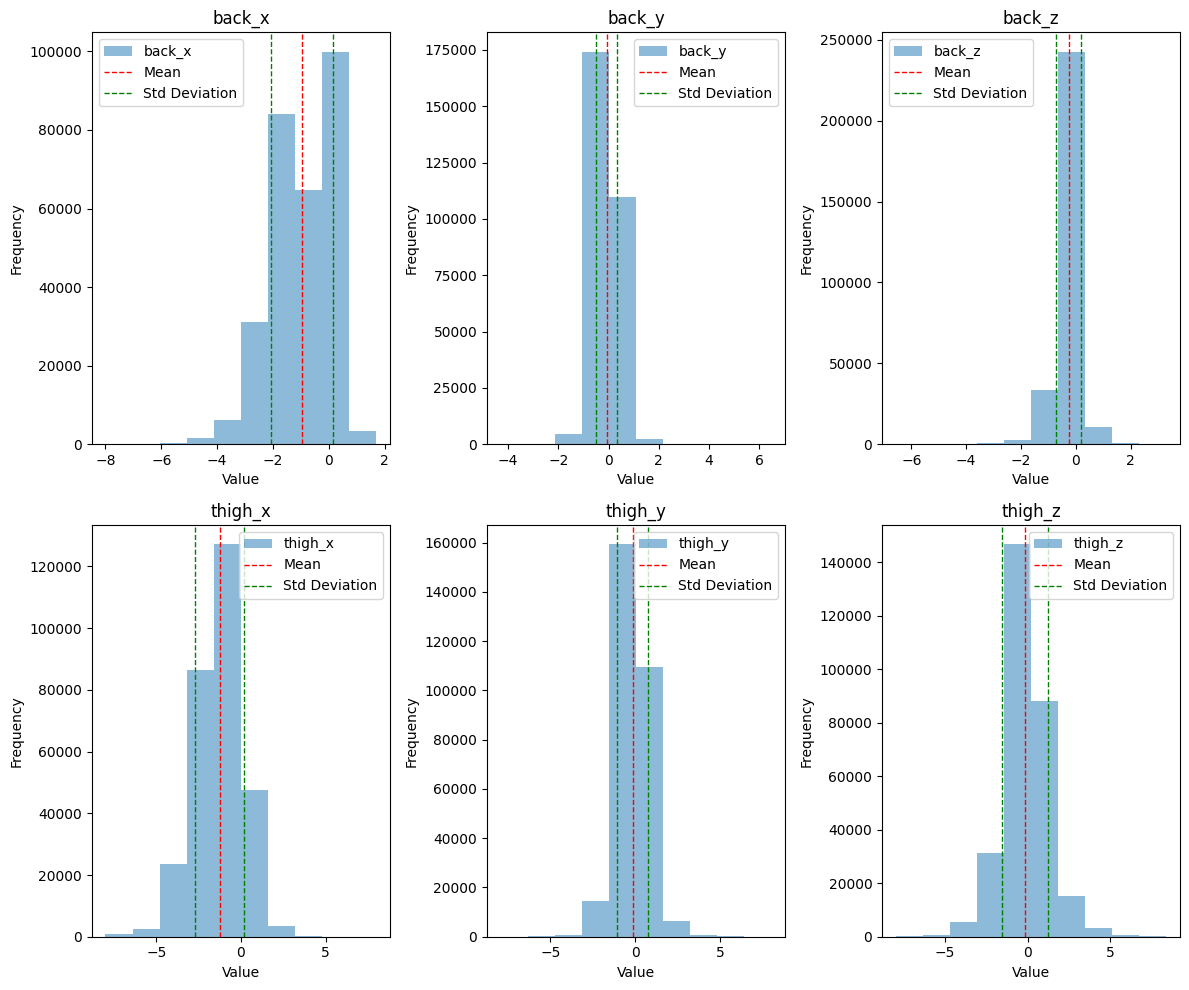

shuffling


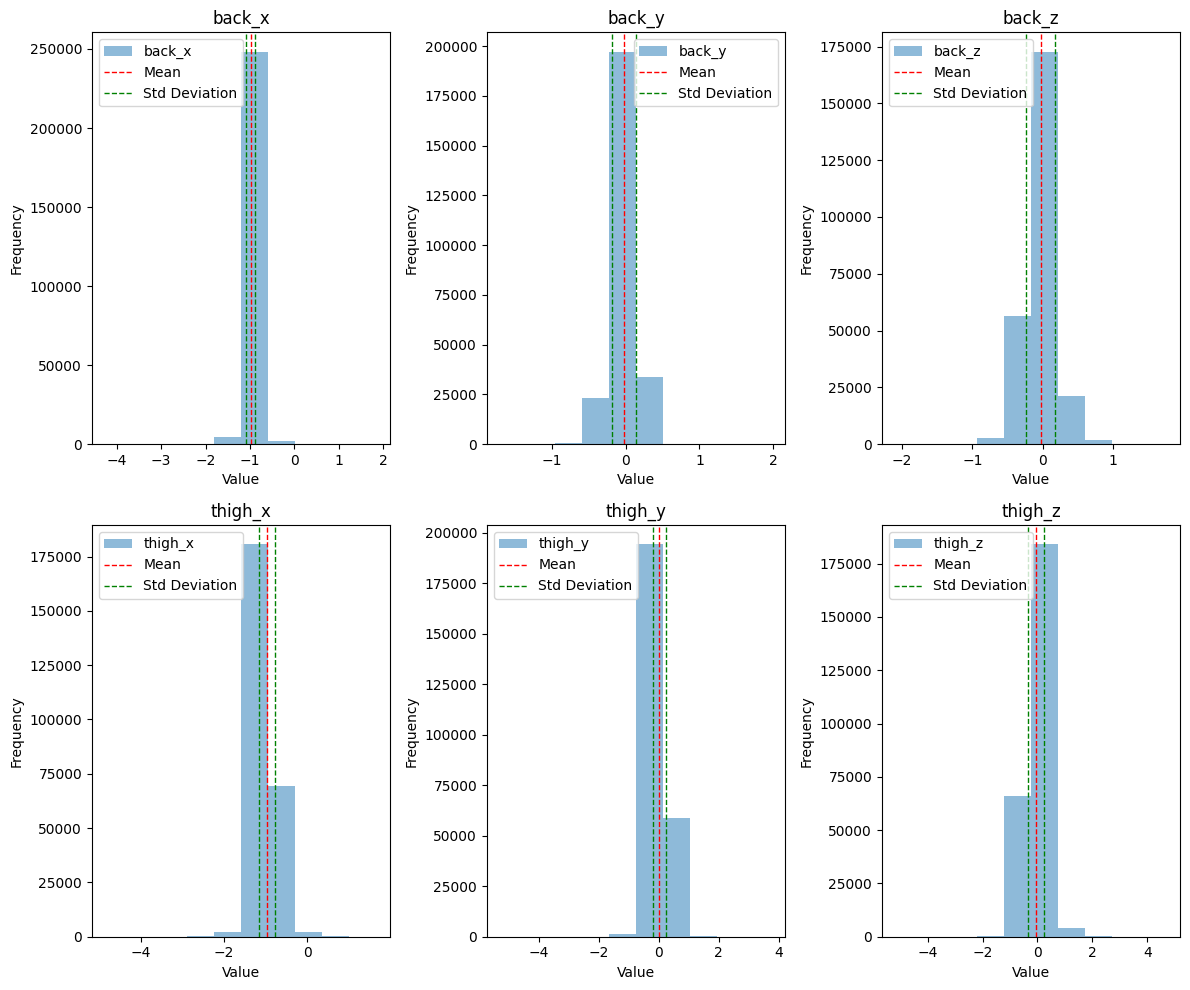

stairs (ascending)


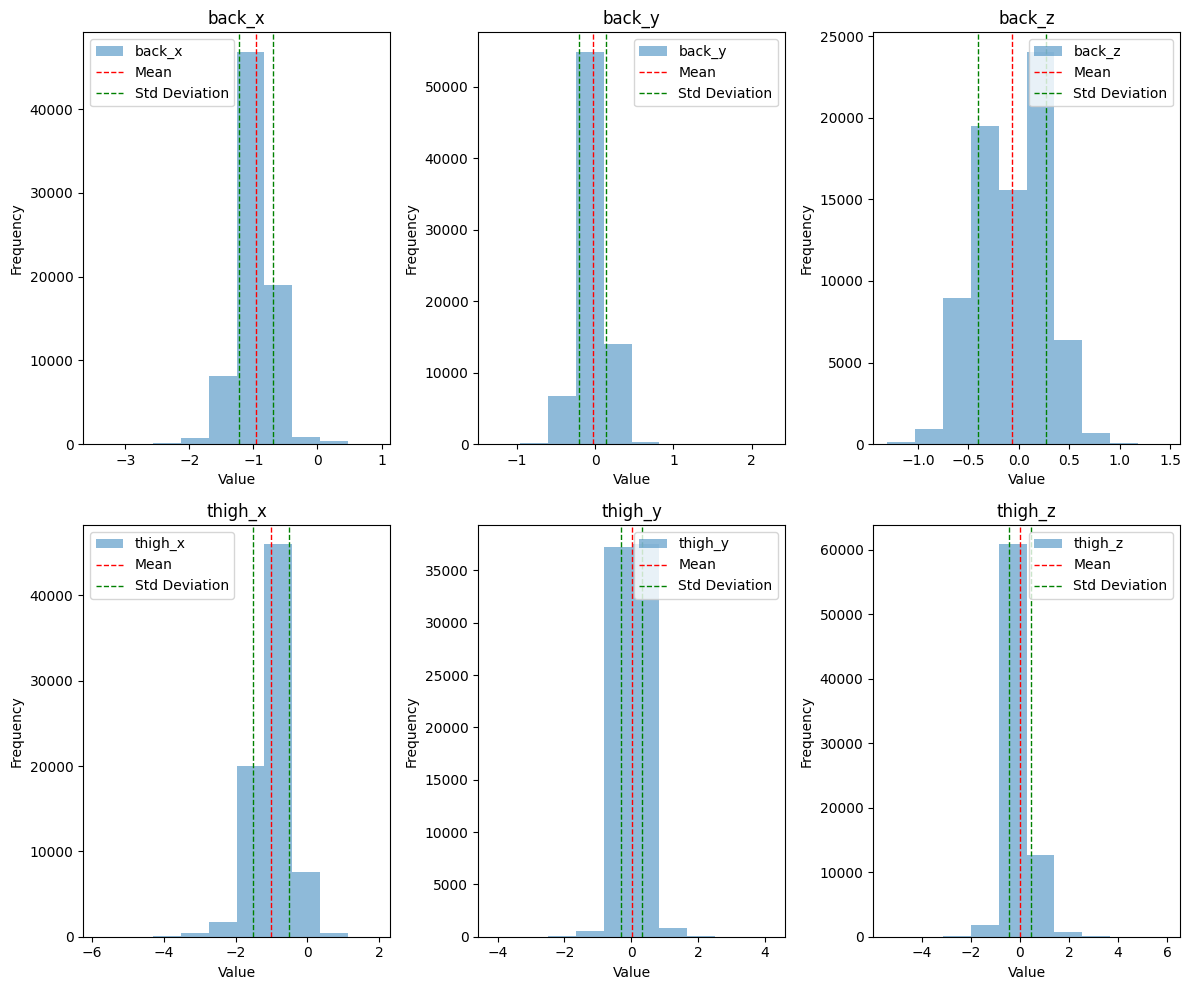

stairs (descending)


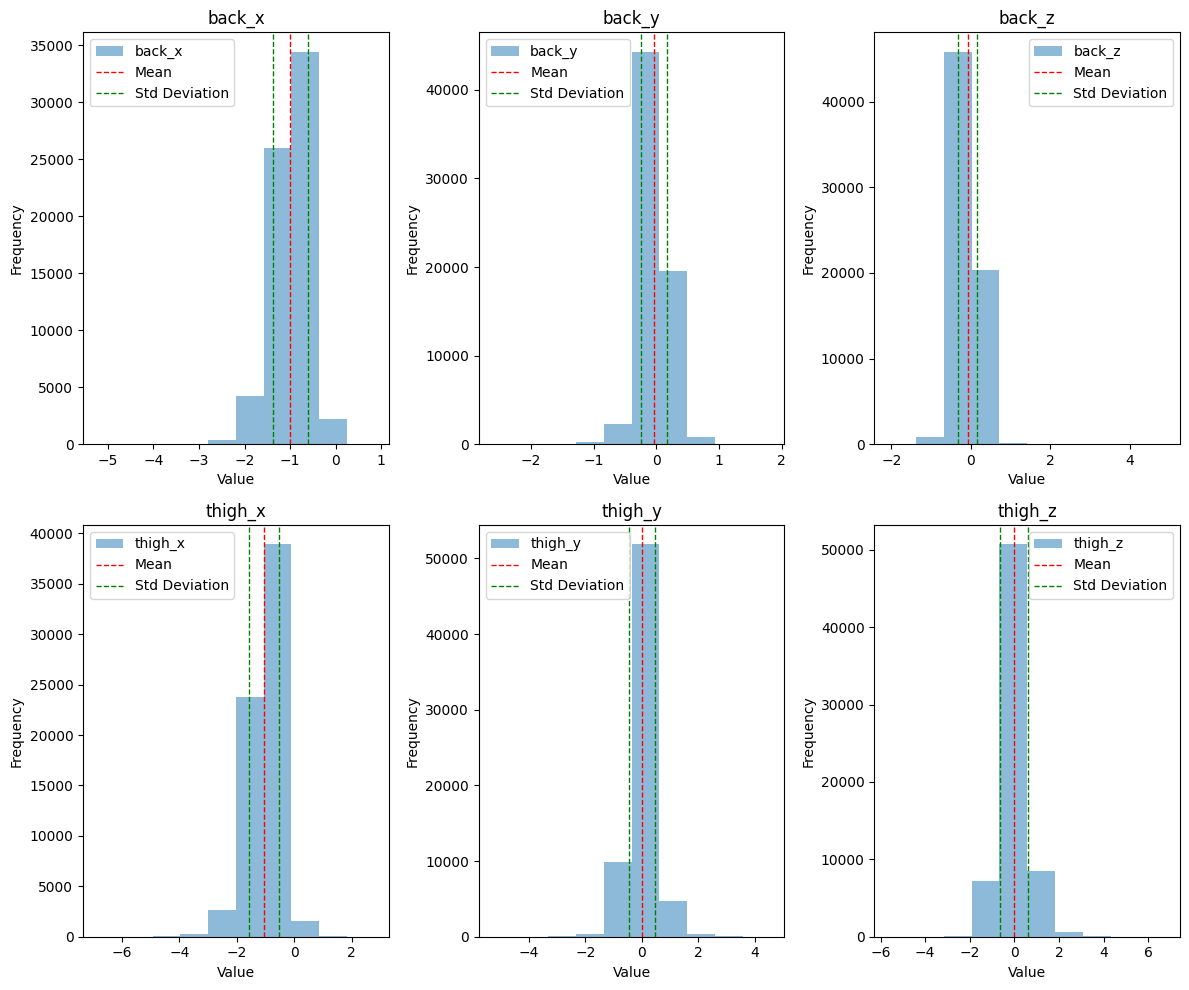

standing


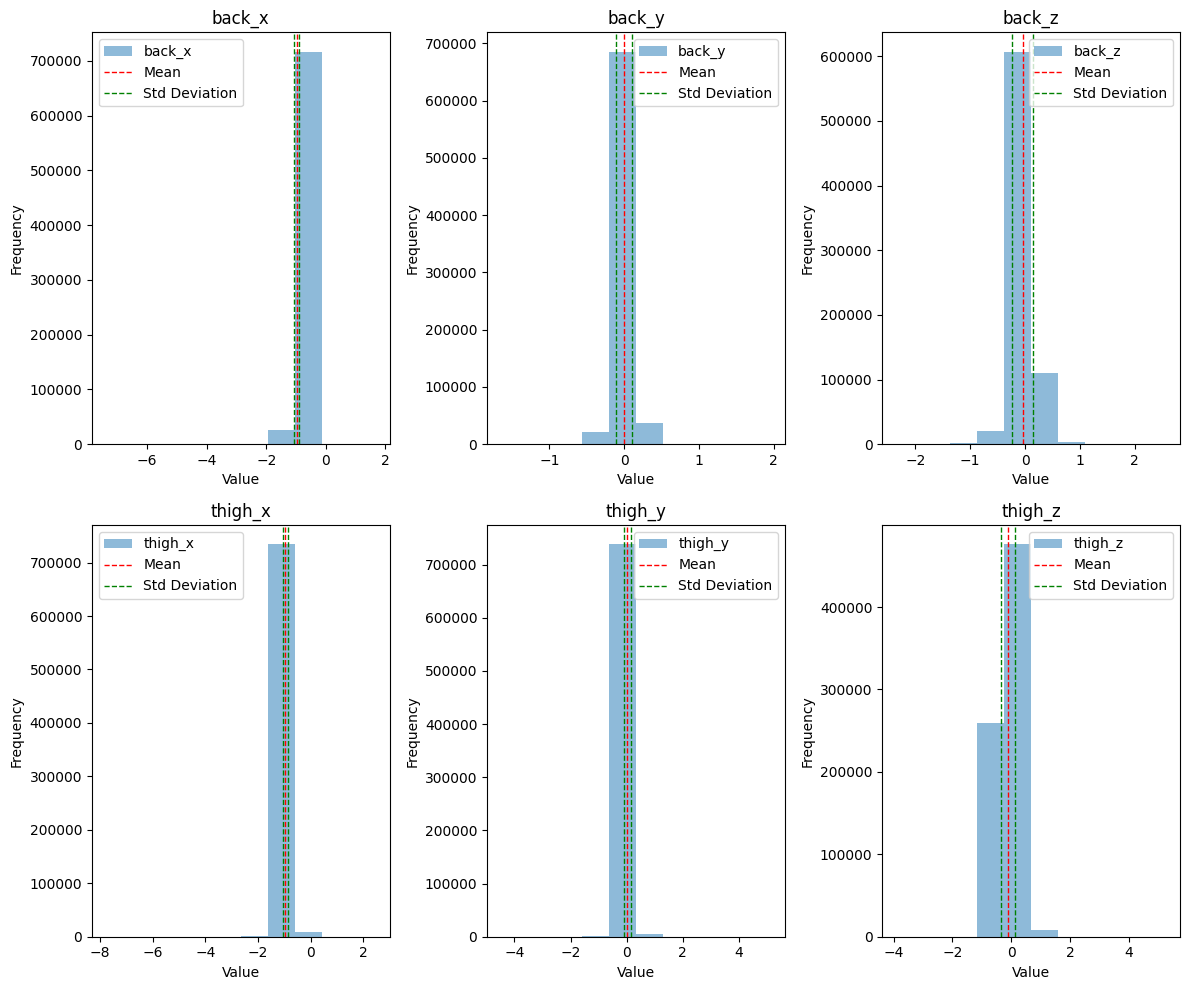

sitting


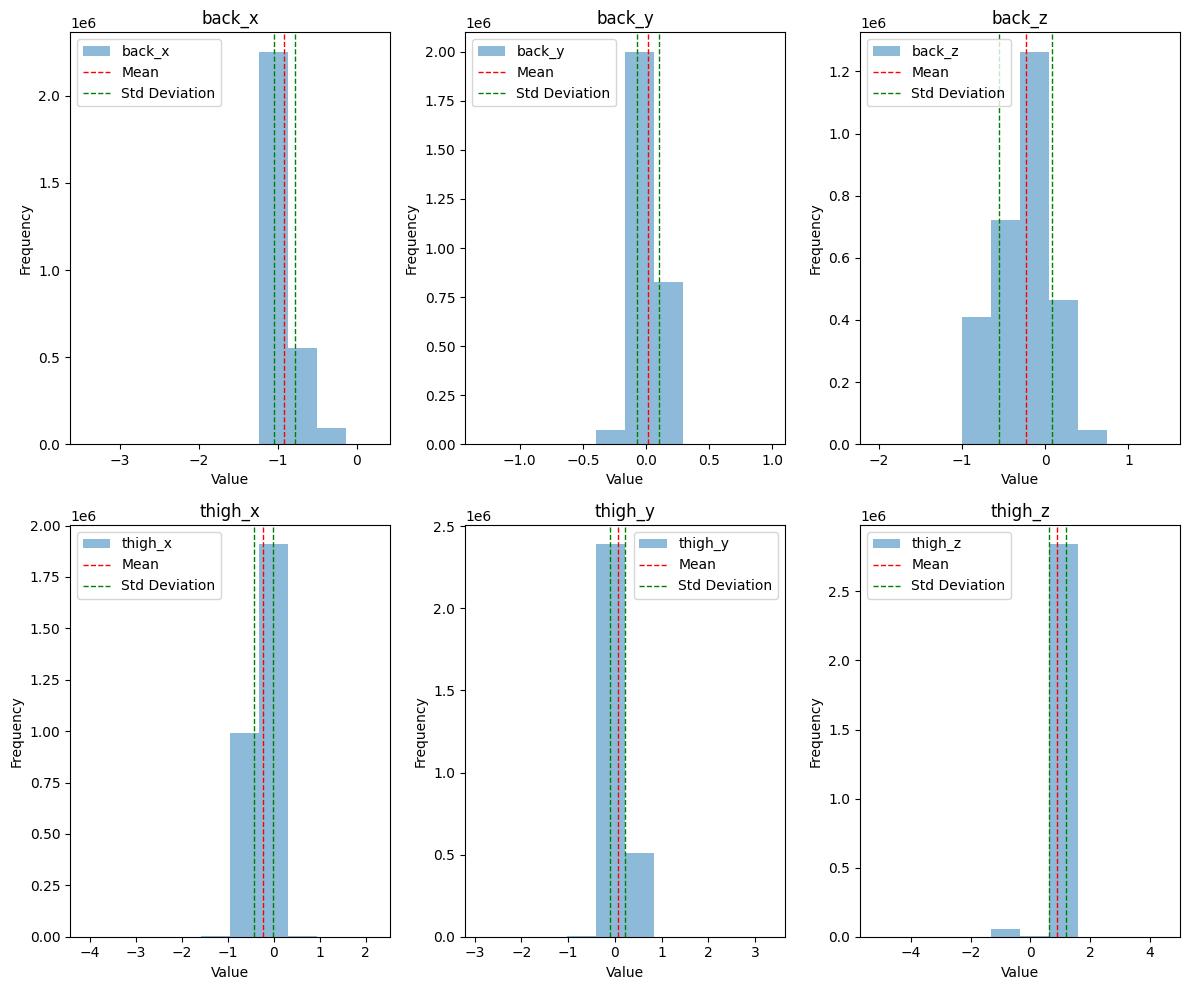

lying


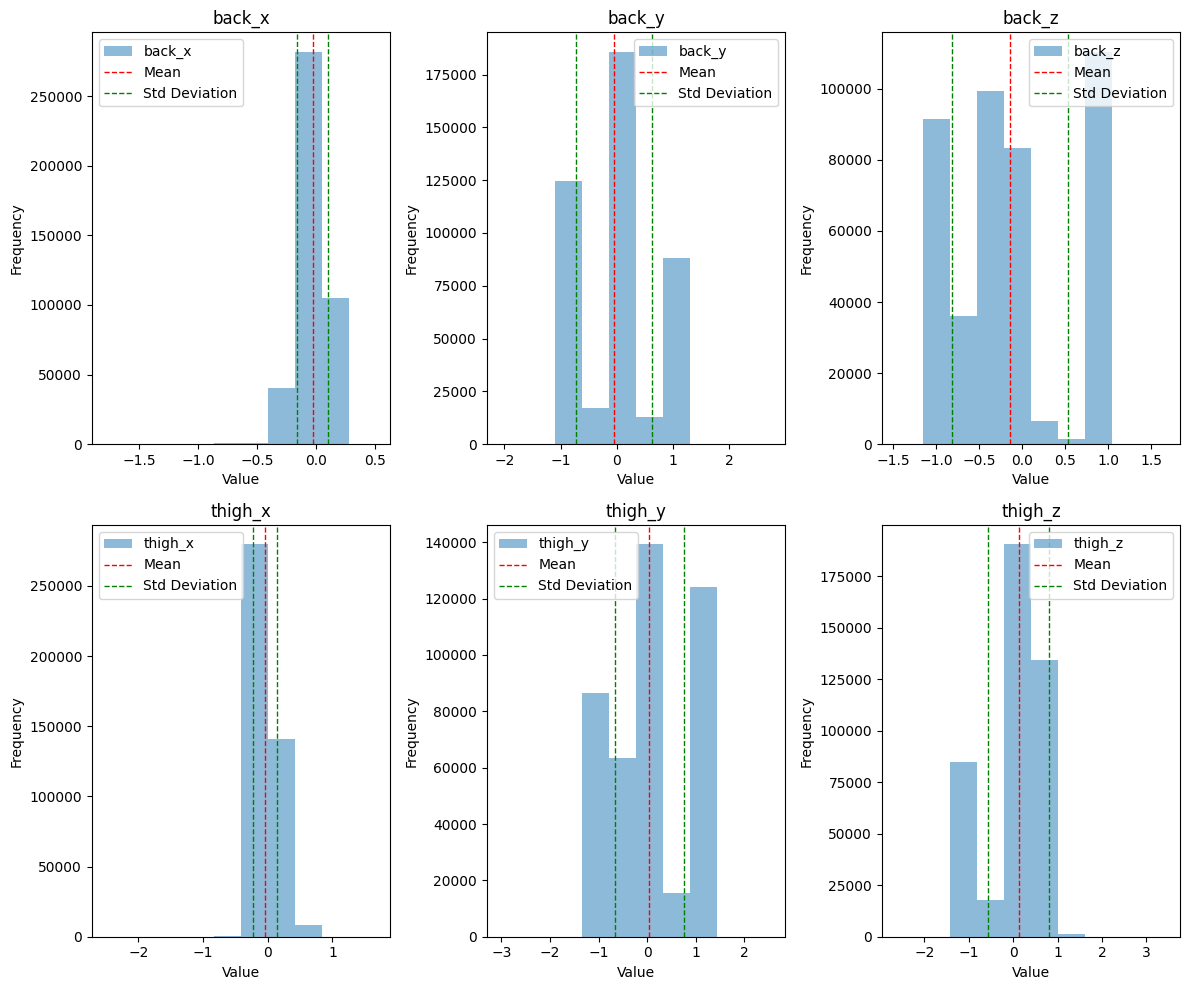

cycling (sit)


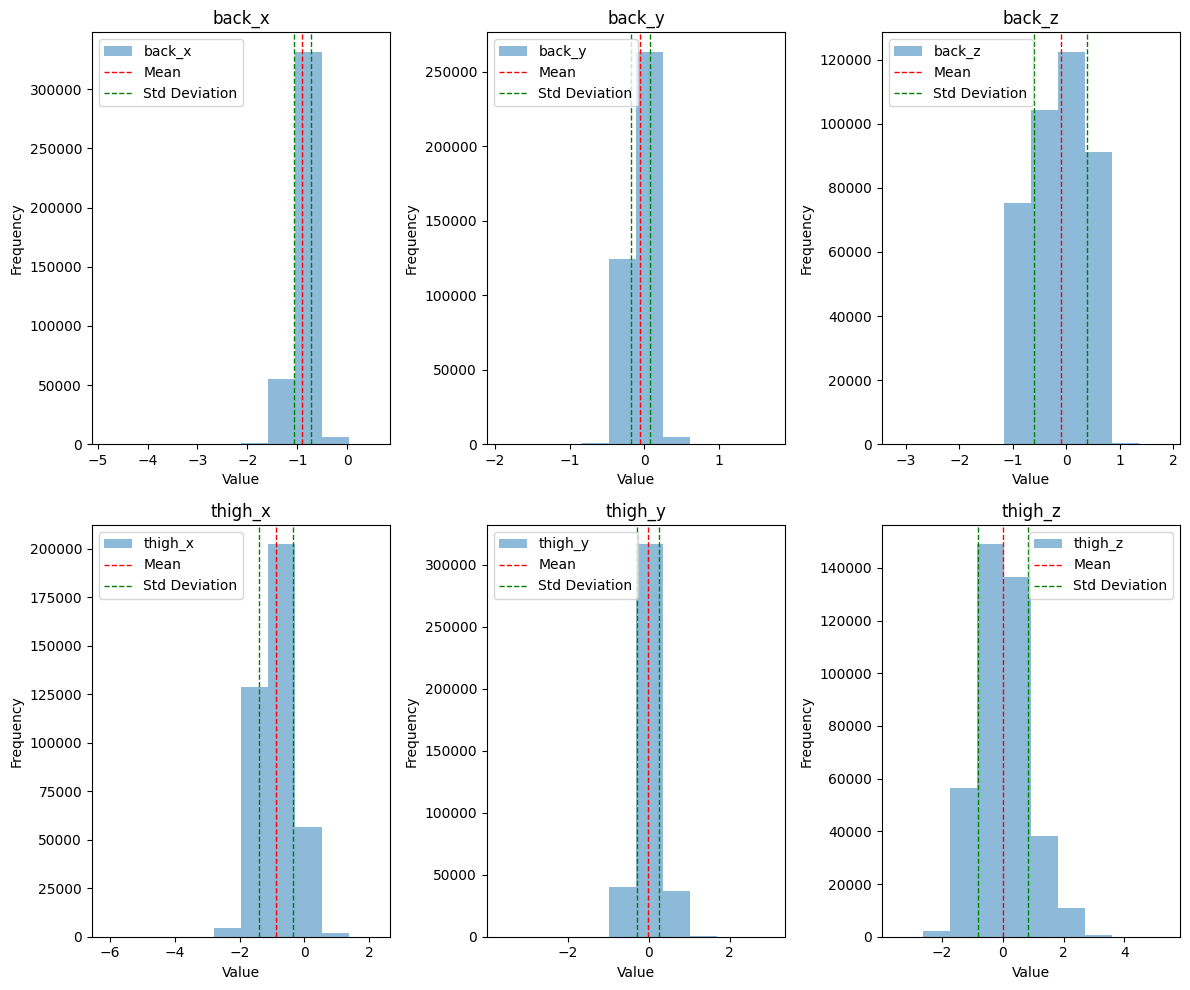

cycling (stand)


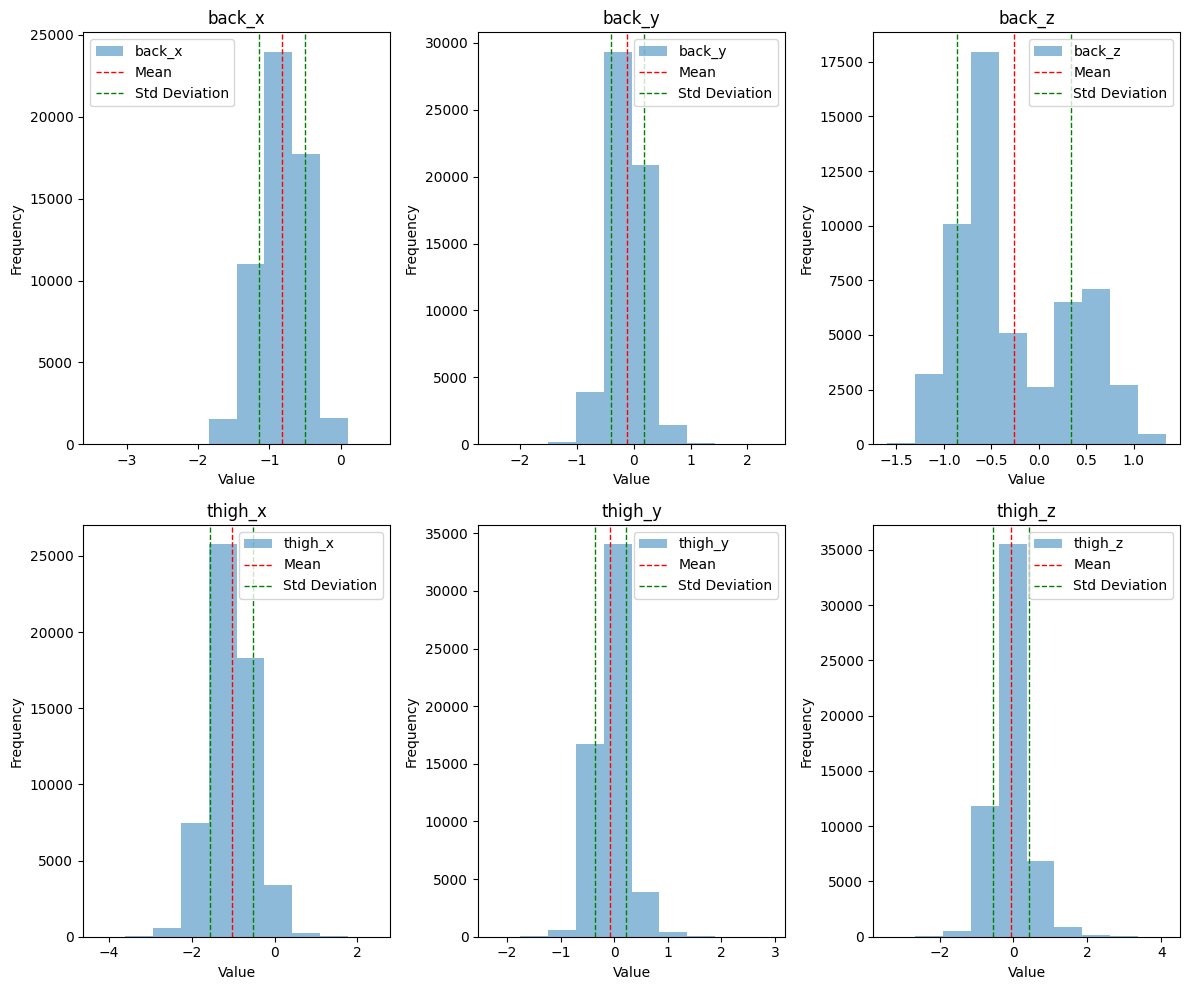

cycling (sit, inactive)


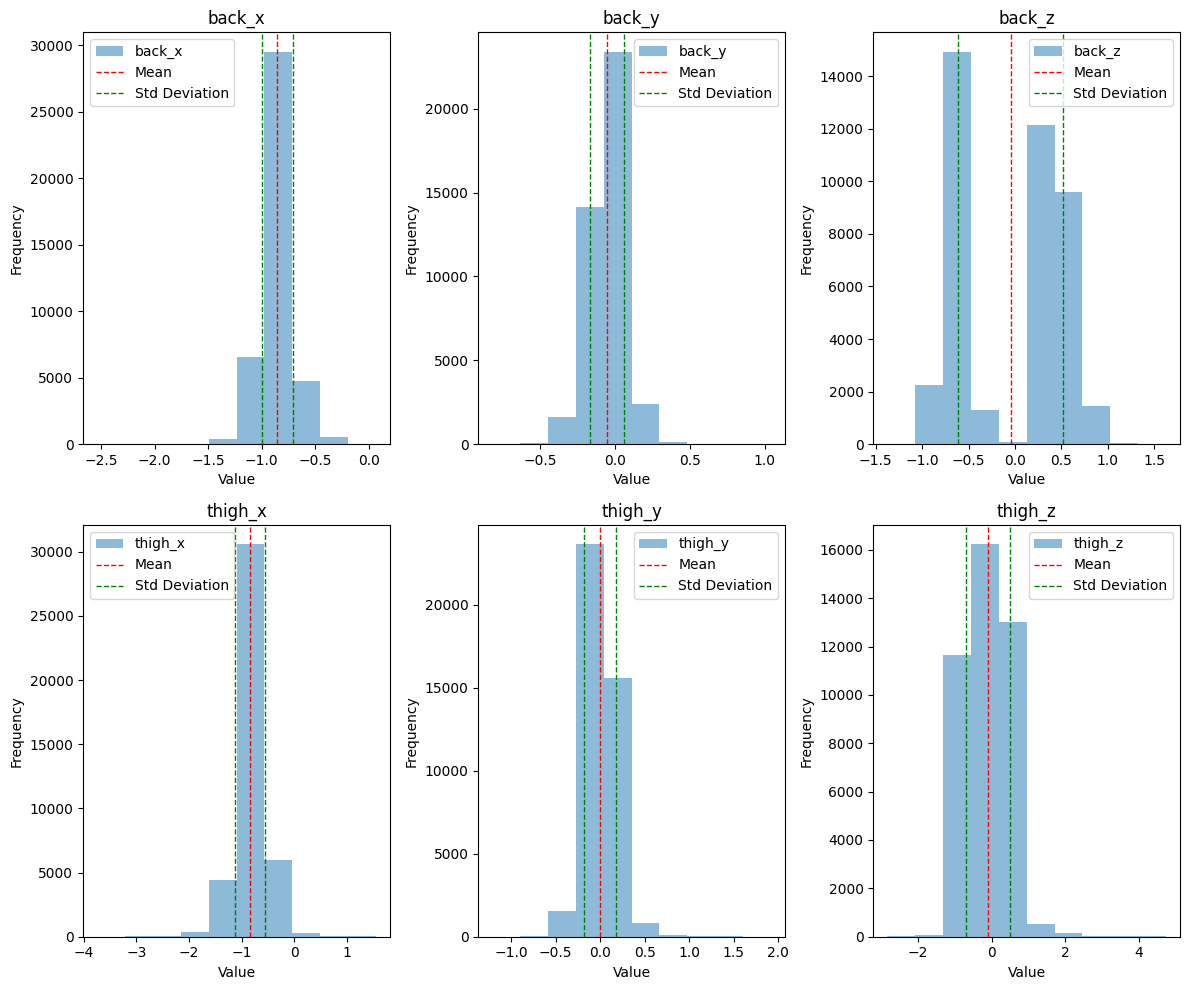

cycling (stand, inactive)


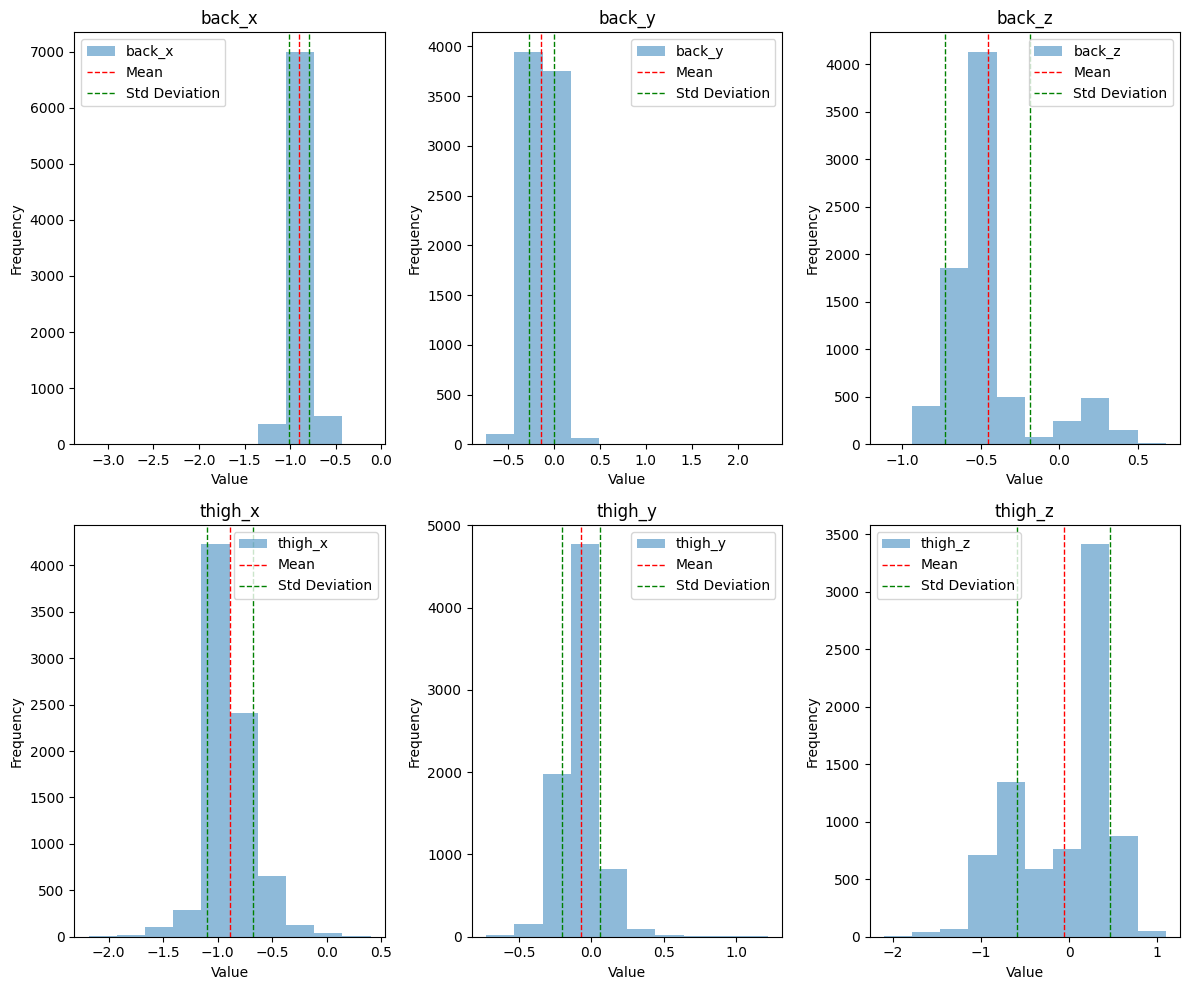

In [ ]:
def createperactiv_plot(i):
    print(activities_names[i])
    plt.figure(figsize=(12, 10))  # Create a figure with a larger size
    plt.subplot(2, 3, 1)
    plt.hist(df_per_activity[i]['back_x'], alpha=0.5, label='back_x')
    plt.axvline(df_per_activity[i]['back_x'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['back_x'].mean() - df_per_activity[i]['back_x'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['back_x'].mean() + df_per_activity[i]['back_x'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('back_x')
    plt.legend()

    plt.subplot(2, 3, 2)
    plt.hist(df_per_activity[i]['back_y'], alpha=0.5, label='back_y')
    plt.axvline(df_per_activity[i]['back_y'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['back_y'].mean() - df_per_activity[i]['back_y'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['back_y'].mean() + df_per_activity[i]['back_y'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('back_y')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.hist(df_per_activity[i]['back_z'], alpha=0.5, label='back_z')
    plt.axvline(df_per_activity[i]['back_z'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['back_z'].mean() - df_per_activity[i]['back_z'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['back_z'].mean() + df_per_activity[i]['back_z'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('back_z')
    plt.legend()

    plt.subplot(2, 3, 4)
    plt.hist(df_per_activity[i]['thigh_x'], alpha=0.5, label='thigh_x')
    plt.axvline(df_per_activity[i]['thigh_x'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['thigh_x'].mean() - df_per_activity[i]['thigh_x'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['thigh_x'].mean() + df_per_activity[i]['thigh_x'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('thigh_x')
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.hist(df_per_activity[i]['thigh_y'], alpha=0.5, label='thigh_y')
    plt.axvline(df_per_activity[i]['thigh_y'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['thigh_y'].mean() - df_per_activity[i]['thigh_y'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['thigh_y'].mean() + df_per_activity[i]['thigh_y'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('thigh_y')
    plt.legend()

    plt.subplot(2, 3, 6)
    plt.hist(df_per_activity[i]['thigh_z'], alpha=0.5, label='thigh_z')
    plt.axvline(df_per_activity[i]['thigh_z'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['thigh_z'].mean() - df_per_activity[i]['thigh_z'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['thigh_z'].mean() + df_per_activity[i]['thigh_z'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('thigh_z')
    plt.legend()


    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

for i in range(len(activities)):
    createperactiv_plot(i)

<h3>Πίνακας Συσχετίσεων</h3>
Στόχος εδώ είναι να δούμε την συσχέτιση των δεδομένων, τόσο μεταξύ τους, όσο και κατα ποσο οδηγούν σε συμπεράσματα για την δραστηριότητα του ατόμου.

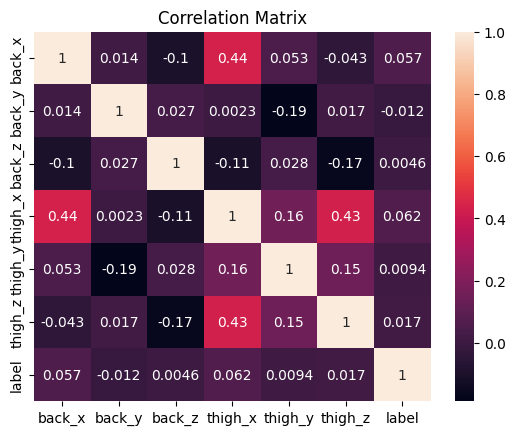

In [ ]:
import seaborn as sns

sns.heatmap(df_notime.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

<h3>Συσχετίσεις ανα δραστηριότητα</h3>
Αυτό το γράφημα έχει σκοπό να δείξει τις συσχετίσεις των μετρήσεων των αισθητήρων μεταξύ τους, ανα δραστηριότητα.

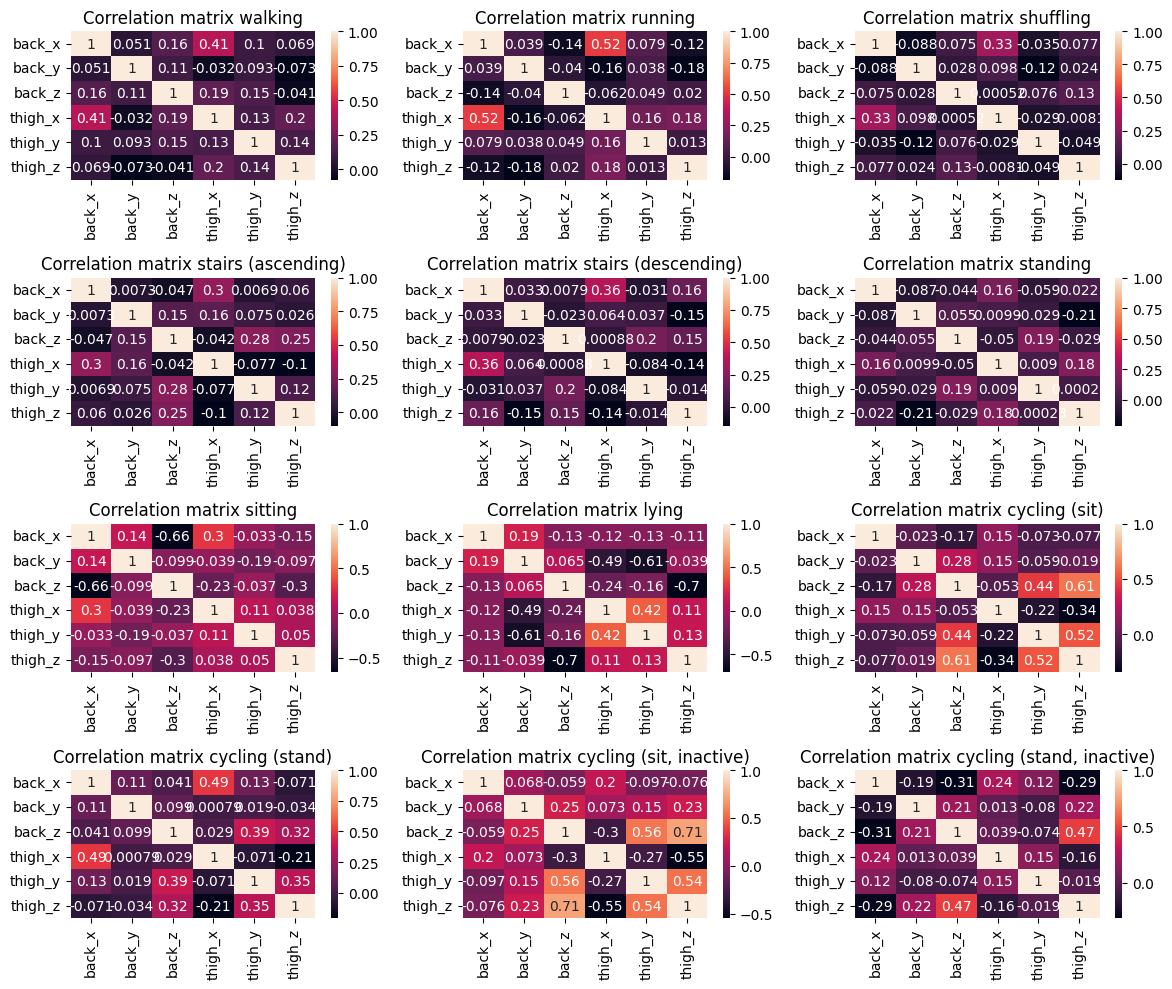

In [ ]:
cnt=0
plt.figure(figsize=(12, 10))
df_copy=dfperActivity()
for i in range(len(df_copy)):
    df_copy[i] = df_copy[i].copy() 
    df_copy[i].drop(['label'],axis=1,inplace=True)
    plt.subplot(4, 3, cnt+1)
    plt.title('Correlation matrix '+activities_names[cnt])
    sns.heatmap(df_copy[i].corr(),annot=True)
    cnt+=1
    
plt.tight_layout()
plt.show()

<h3>Εντοπισμός Outliers</h3>


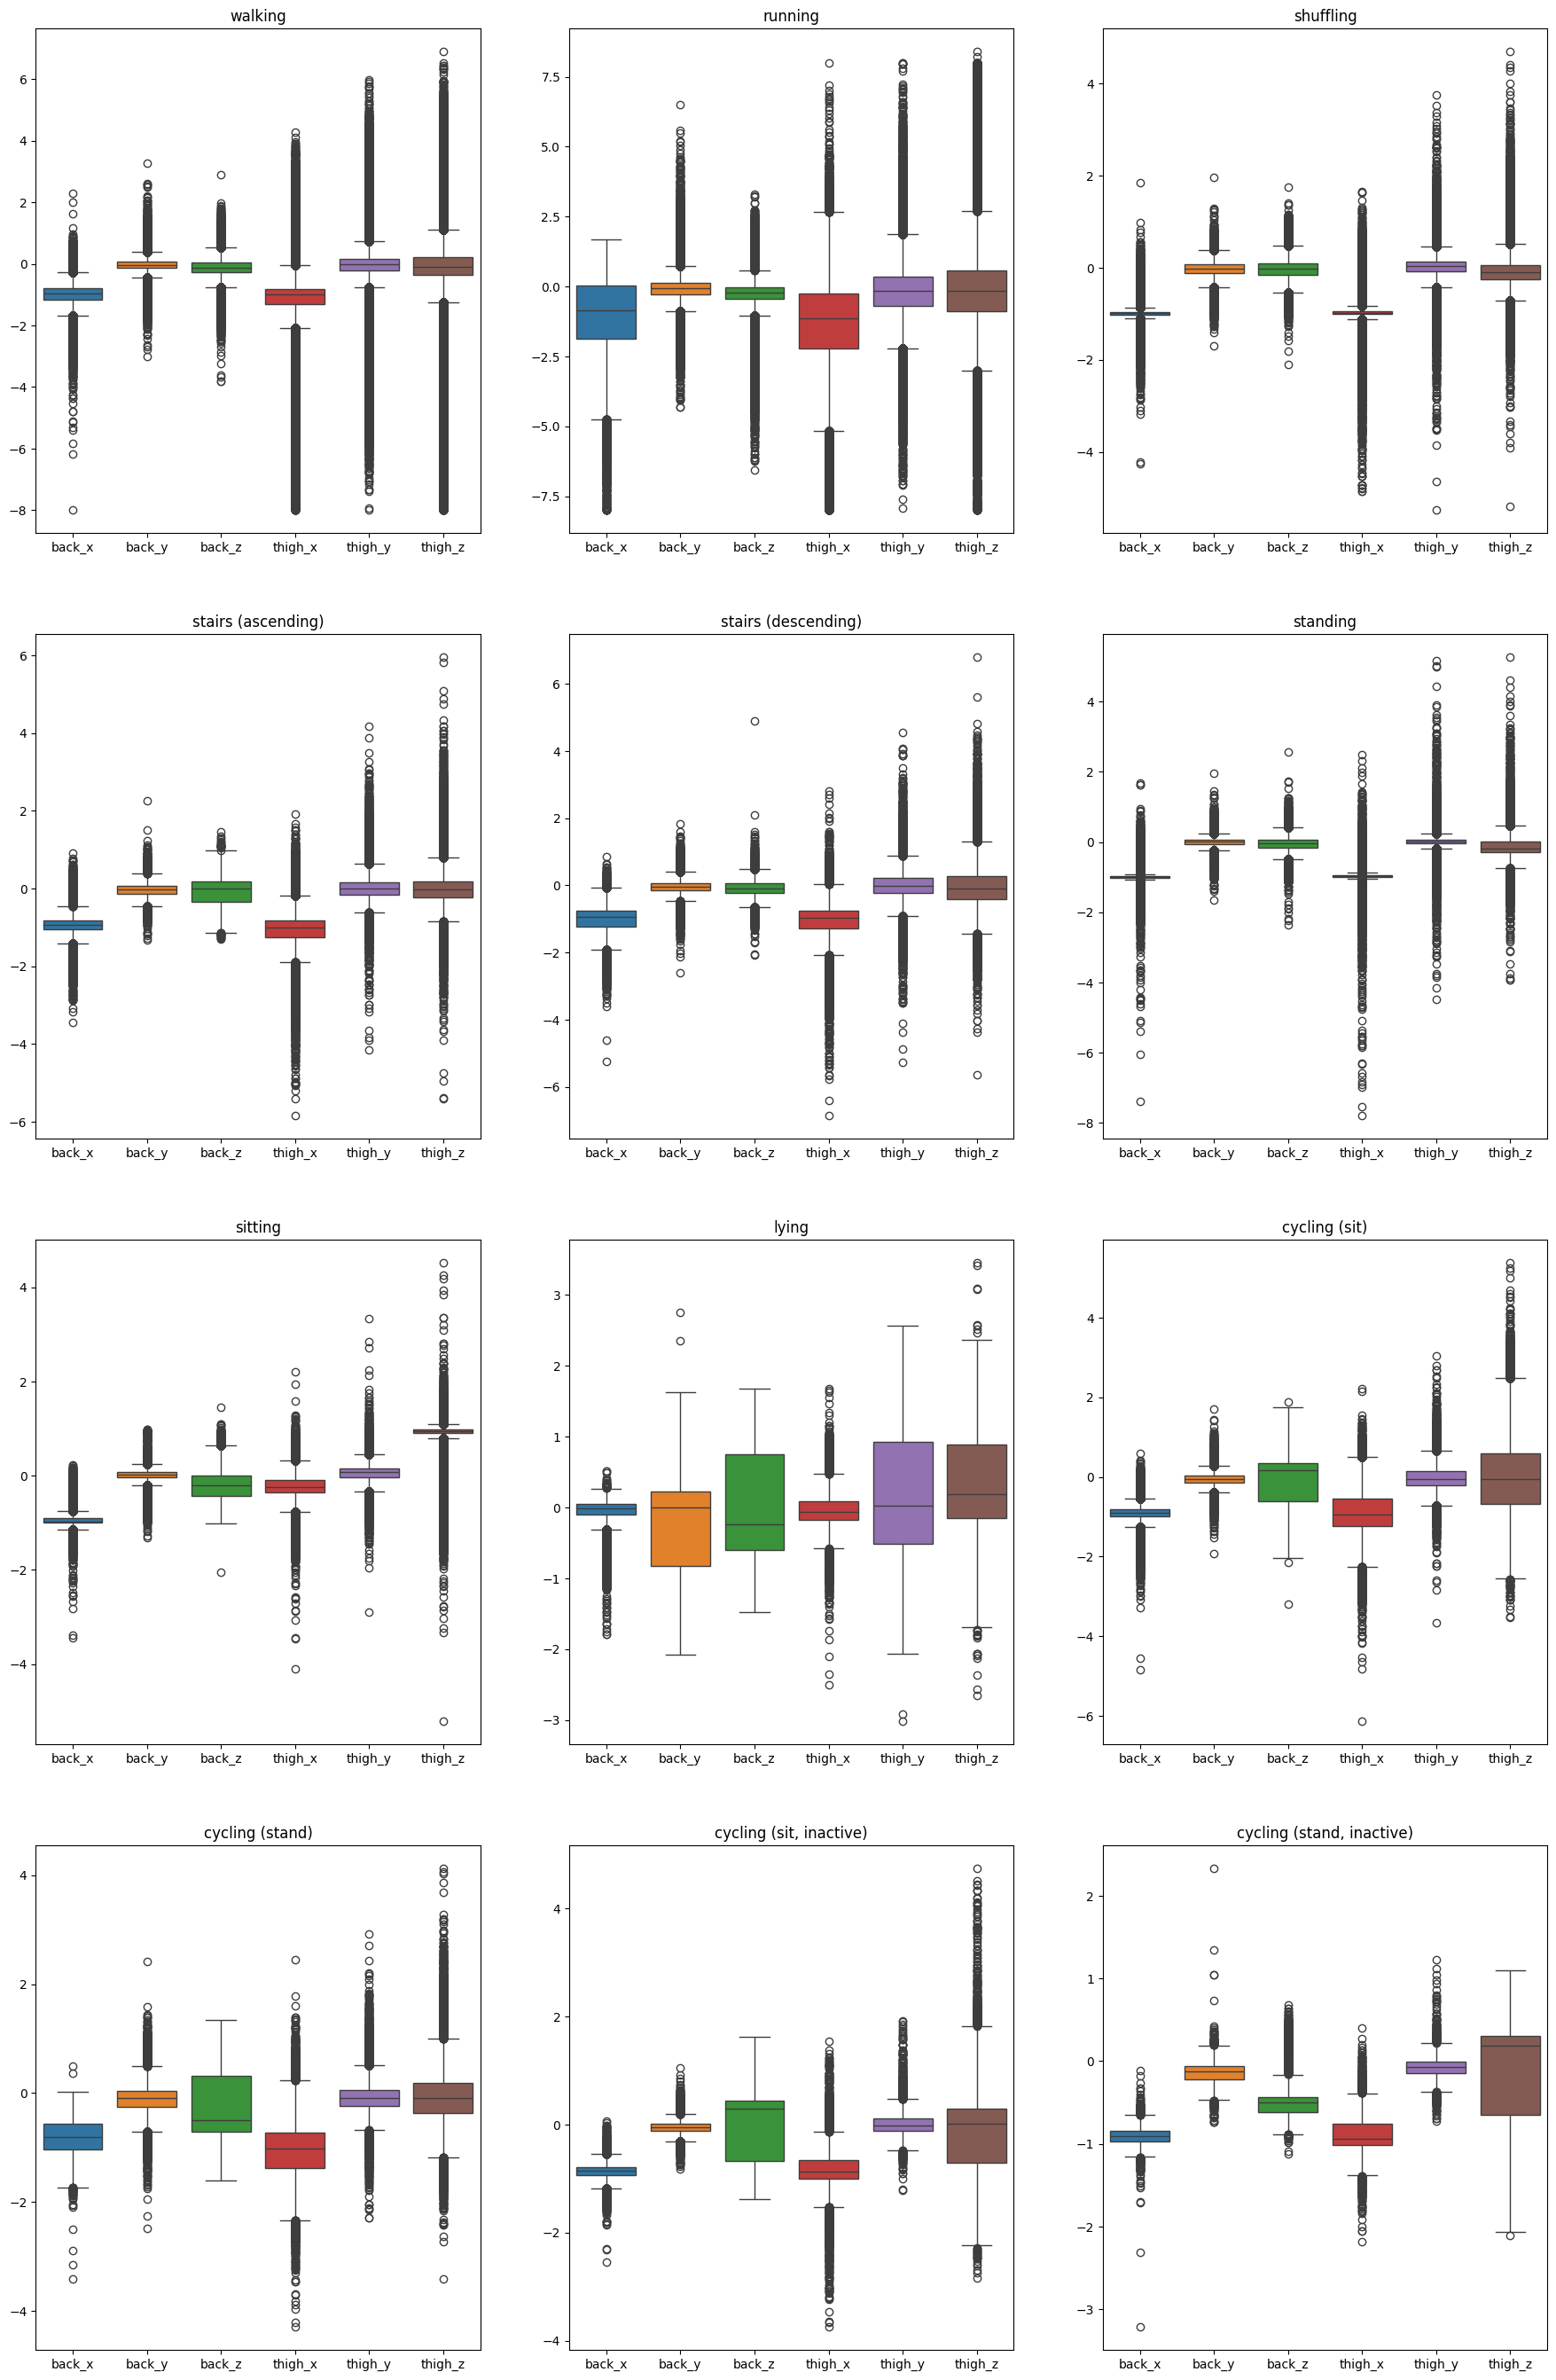

In [ ]:
import seaborn as sns
plt.figure(figsize=(22, 34))
for i in range(len(activities)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df_copy[i])
    plt.title(activities_names[i])
    
plt.show()



<h2>Ερώτημα 2</h2>

<h3>Πρώτη Προσέγγιση</h3>
Αρχικά ως, πρώτη προσέγγιση εκπαιδούμε τους 3 ταξινομητές στα δεδομένα μας όπως αυτά είναι αγνοώντας οποιαδήποτε χρονική αλληλουχία.

In [ ]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe():
    df=pd.DataFrame()
    for i in testers:
        tester_df = pd.read_sql_query(dataOfTester(i), conn)
        if(i=='S015' or i=='S021'):
            tester_df=tester_df.drop(columns=['index'])
        if(i=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
        df=pd.concat([df,tester_df],ignore_index=True)
    return df

df=pd.DataFrame()
df=createDataframe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 394.4+ MB


<h4>Dataframe χώρις timestamp</h4>
Εδώ θα εκπαιδεύσουμε τα μοντέλα μας και θα τα διαχειριστούμε αγνοώντας τελείως οτι αυτά αποτελούν χρονικές σειρές. Θα κάνουμε classfication  σαν να είναι απλα, μεμονωμένα δεδομένα.

In [ ]:
df_notime=pd.DataFrame()
df_notime=df.drop(columns=['timestamp'])
df_notime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   back_x   float64
 1   back_y   float64
 2   back_z   float64
 3   thigh_x  float64
 4   thigh_y  float64
 5   thigh_z  float64
 6   label    int64  
dtypes: float64(6), int64(1)
memory usage: 345.1 MB


<h4>Χωρισμός σε Test/Train και Κανονικοποιήση δεδομένων</h4>
Είναι πρακτικό και βοηθάει με βάση την θεωρία να εκπαιδεύσουμε τα μοντέλα μας σε κανονικοποιημένα δεδομένα.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df_notime.drop(columns=['label'])
Y=df_notime['label']
#dont forget to check with stratify=Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

<h4>Neural Network Classifier</h4>

Training

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000,activation='tanh',random_state=42,early_stopping=True)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', early_stopping=True, max_iter=1000,
              random_state=42)

Results and Metrics

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
mlppredicts=mlp.predict(X_test)
mlp_report=classification_report(y_test,mlppredicts)
mlp_accur=accuracy_score(y_test,mlppredicts)
mlp_score=mlp.score(X_train,y_train)
print("MLP report:",mlp_report,"MLP accuracy:",mlp_accur,"MLP training:",mlp_score)

MLP report:               precision    recall  f1-score   support

           1       0.76      0.85      0.80    239594
           2       0.90      0.83      0.86     58550
           3       0.43      0.17      0.24     51051
           4       0.33      0.05      0.08     15304
           5       0.34      0.02      0.04     13441
           6       0.75      0.89      0.81    148170
           7       0.99      1.00      0.99    580473
           8       1.00      1.00      1.00     85900
          13       0.79      0.85      0.82     78847
          14       0.59      0.51      0.55     11086
         130       0.49      0.42      0.45      8275
         140       0.59      0.27      0.37      1575

    accuracy                           0.88   1292266
   macro avg       0.66      0.57      0.59   1292266
weighted avg       0.86      0.88      0.86   1292266
 MLP accuracy: 0.8780491013460077 MLP training: 0.8782935859542795


<h4>Random Forest Classifier</h4>

Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=42)

Results and Metrics

In [ ]:
rfpredicts=rf.predict(X_test)
rf_report=classification_report(y_test,rfpredicts)
rf_accur=accuracy_score(y_test,rfpredicts)
rf_score=rf.score(X_train,y_train)
print("RF report:",rf_report,"RF accuracy:",rf_accur,"RF training:",rf_score)

RF report:               precision    recall  f1-score   support

           1       0.78      0.89      0.83    239594
           2       0.92      0.89      0.90     58550
           3       0.55      0.31      0.40     51051
           4       0.65      0.23      0.34     15304
           5       0.57      0.09      0.15     13441
           6       0.85      0.89      0.87    148170
           7       1.00      1.00      1.00    580473
           8       1.00      1.00      1.00     85900
          13       0.82      0.89      0.85     78847
          14       0.73      0.60      0.66     11086
         130       0.66      0.49      0.56      8275
         140       0.71      0.48      0.57      1575

    accuracy                           0.90   1292266
   macro avg       0.77      0.65      0.68   1292266
weighted avg       0.89      0.90      0.89   1292266
 RF accuracy: 0.9016471840936773 RF training: 0.9999920681934169


<h4>Naive Bayes Classifier</h4>

Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

Results and Metrics

In [ ]:
predicts_gnb=gnb.predict(X_test)
gnb_report=classification_report(y_test,predicts_gnb)
gnb_accur=accuracy_score(y_test,predicts_gnb)
gnb_score=gnb.score(X_train,y_train)
print("GNB estim report: \n",gnb_report,'\n',"GNB estim accuracy:",gnb_accur,'\n',"GNB training:",gnb_score)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GNB estim report: 
               precision    recall  f1-score   support

           1       0.65      0.53      0.59    239594
           2       0.62      0.62      0.62     58550
           3       0.15      0.10      0.12     51051
           4       0.00      0.00      0.00     15304
           5       0.00      0.00      0.00     13441
           6       0.55      0.93      0.69    148170
           7       0.97      0.98      0.97    580473
           8       0.92      0.98      0.95     85900
          13       0.57      0.54      0.56     78847
          14       0.34      0.11      0.17     11086
         130       0.00      0.00      0.00      8275
         140       0.16      0.01      0.01      1575

    accuracy                           0.78   1292266
   macro avg       0.41      0.40      0.39   1292266
weighted avg       0.75      0.78      0.76   1292266
 
 GNB estim accuracy: 0.7750215512905237 
 GNB training: 0.7750775672646217


<h4>Compare the Classifiers</h4>

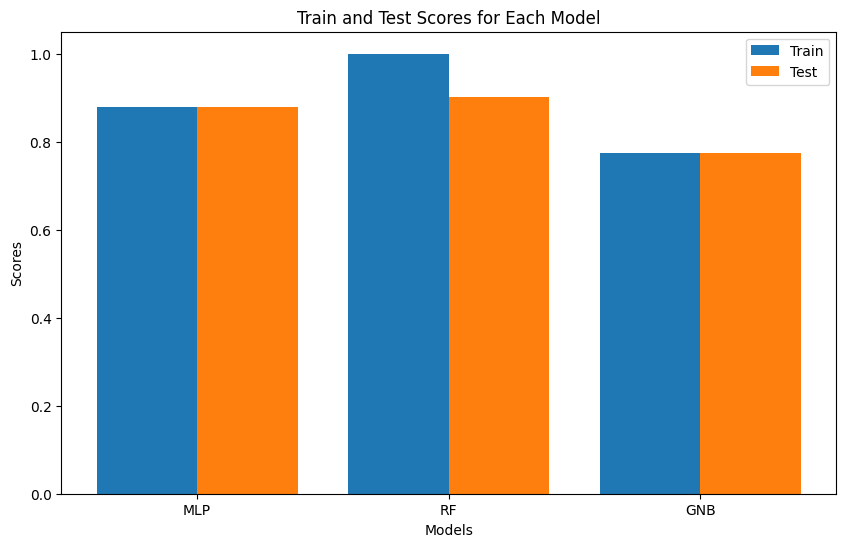

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
models=['MLP','RF','GNB']
accuracies=[mlp_accur,rf_accur,gnb_accur]
trainingscores=[mlp_score,rf_score,gnb_score]

# Plot
plt.figure(figsize=(10, 6))
x=np.arange(len(accuracies))

plt.bar(x-0.2, trainingscores,0.4, label='Train')
plt.bar(x+0.2, accuracies,0.4,label='Test')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores for Each Model')
plt.legend()
plt.show()



<h3>Δεύτερη Προσέγγιση</h3>
Στο σημείο αυτό, δημιουργούμε ενα rolling window, το οποίο για κάθε δεδομένο υπολογίζει τον μέσο όρο απο 5 στιγμες και 5 στιγμες μέτα. Έτσι περνιέται η πληροφορία των προηγούμενων και επόμενων στιγμών επιτυγχάνοντας καλύτερες αποδόσεις.

<h4>Data collection</h4>

In [ ]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label  sample
0 -3.810360  0.165219 -0.663742 -0.919657 -0.759899  0.239633      6       0
1 -0.188988 -0.235452 -1.343093 -0.137463 -0.852652 -1.423640      6       1
2 -0.060000  0.008919 -0.876293  1.347957 -0.642281 -2.081678      6       2
3 -1.222393  0.028038 -0.460220  1.063477 -2.840740 -0.143171      6       3
4 -1.026113 -0.170239 -0.163068 -3.239610  0.924564 -0.720399      6       4

In [ ]:
for i in tester_df:
    i.info()

for i in tester_df:
    print(i.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408709 entries, 0 to 408708
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   408709 non-null  float64
 1   back_y   408709 non-null  float64
 2   back_z   408709 non-null  float64
 3   thigh_x  408709 non-null  float64
 4   thigh_y  408709 non-null  float64
 5   thigh_z  408709 non-null  float64
 6   label    408709 non-null  int64  
 7   sample   408709 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 24.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418989 entries, 0 to 418988
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   418989 non-null  float64
 1   back_y   418989 non-null  float64
 2   back_z   418989 non-null  float64
 3   thigh_x  418989 non-null  float64
 4   thigh_y  418989 non-null  float64
 5   thigh_z  418989 non-null  float64
 6   label    418989 non-nu

<h4>Rolling Window - means</h4>

In [ ]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))





          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

In [ ]:
#unite all the dataframes inside the rolling_window list

unified_df=pd.concat(rolling_window,ignore_index=True)


back_x    back_y    back_z  thigh_x   thigh_y   thigh_z  label
6461323 -0.991919 -0.072485 -0.209595 -0.97815 -0.193555  0.115332      3
6461324 -0.991919 -0.072485 -0.209595 -0.97815 -0.193555  0.115332      3
6461325 -0.991919 -0.072485 -0.209595 -0.97815 -0.193555  0.115332      3
6461326 -0.991919 -0.072485 -0.209595 -0.97815 -0.193555  0.115332      3
6461327 -0.991919 -0.072485 -0.209595 -0.97815 -0.193555  0.115332      3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=unified_df.drop(columns=['label'])
Y=unified_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h4>Random Forest Classifier</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=42)

In [ ]:
#48min
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rfpredicts=rf.predict(X_test)
rf_report=classification_report(y_test,rfpredicts)
rf_accur=accuracy_score(y_test,rfpredicts)
rf_score=rf.score(X_train,y_train)
print("RF report:",rf_report,"RF accuracy:",rf_accur,"RF training:",rf_score)

RF report:               precision    recall  f1-score   support

           1       0.86      0.94      0.90    359238
           2       0.95      0.91      0.93     87592
           3       0.75      0.58      0.65     76676
           4       0.80      0.56      0.66     22897
           5       0.75      0.33      0.46     20140
           6       0.92      0.93      0.93    222327
           7       1.00      1.00      1.00    870840
           8       1.00      1.00      1.00    128693
          13       0.93      0.97      0.95    118360
          14       0.89      0.83      0.86     16772
         130       0.87      0.80      0.83     12493
         140       0.90      0.77      0.83      2371

    accuracy                           0.94   1938399
   macro avg       0.88      0.80      0.83   1938399
weighted avg       0.94      0.94      0.94   1938399
 RF accuracy: 0.9419820171182507 RF training: 0.9999969046606745


<h4>Naive Bayes Classifier</h4>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
predicts_gnb=gnb.predict(X_test)
gnb_report=classification_report(y_test,predicts_gnb)
gnb_accur=accuracy_score(y_test,predicts_gnb)
gnb_score=gnb.score(X_train,y_train)
print("GNB estim report: \n",gnb_report,'\n',"GNB estim accuracy:",gnb_accur,'\n',"GNB training:",gnb_score)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GNB estim report: 
               precision    recall  f1-score   support

           1       0.73      0.65      0.69    359238
           2       0.71      0.64      0.68     87592
           3       0.30      0.06      0.10     76676
           4       0.05      0.00      0.00     22897
           5       0.00      0.00      0.00     20140
           6       0.55      0.92      0.68    222327
           7       0.98      0.98      0.98    870840
           8       0.94      1.00      0.97    128693
          13       0.70      0.77      0.74    118360
          14       0.46      0.30      0.37     16772
         130       0.26      0.02      0.03     12493
         140       0.17      0.01      0.02      2371

    accuracy                           0.81   1938399
   macro avg       0.49      0.45      0.44   1938399
weighted avg       0.79      0.81      0.79   1938399
 
 GNB estim accuracy: 0.8124091066906246 
 GNB training: 0.8127140620602269


<h4>Neural Network Classifier</h4>

In [ ]:
#24 min
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000,activation='tanh',random_state=42,early_stopping=True)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', early_stopping=True, max_iter=1000,
              random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
mlppredicts=mlp.predict(X_test)
mlp_report=classification_report(y_test,mlppredicts)
mlp_accur=accuracy_score(y_test,mlppredicts)
mlp_score=mlp.score(X_train,y_train)
print("MLP report:",mlp_report,"MLP accuracy:",mlp_accur,"MLP training:",mlp_score)

MLP report:               precision    recall  f1-score   support

           1       0.82      0.86      0.84    359238
           2       0.90      0.84      0.87     87592
           3       0.44      0.25      0.32     76676
           4       0.54      0.29      0.38     22897
           5       0.57      0.13      0.21     20140
           6       0.76      0.89      0.82    222327
           7       1.00      1.00      1.00    870840
           8       1.00      1.00      1.00    128693
          13       0.87      0.94      0.90    118360
          14       0.74      0.66      0.70     16772
         130       0.63      0.55      0.59     12493
         140       0.62      0.51      0.56      2371

    accuracy                           0.90   1938399
   macro avg       0.74      0.66      0.68   1938399
weighted avg       0.89      0.90      0.89   1938399
 MLP accuracy: 0.895525121504912 MLP training: 0.8961325724989271


<h4>Compare the Classifiers</h4>

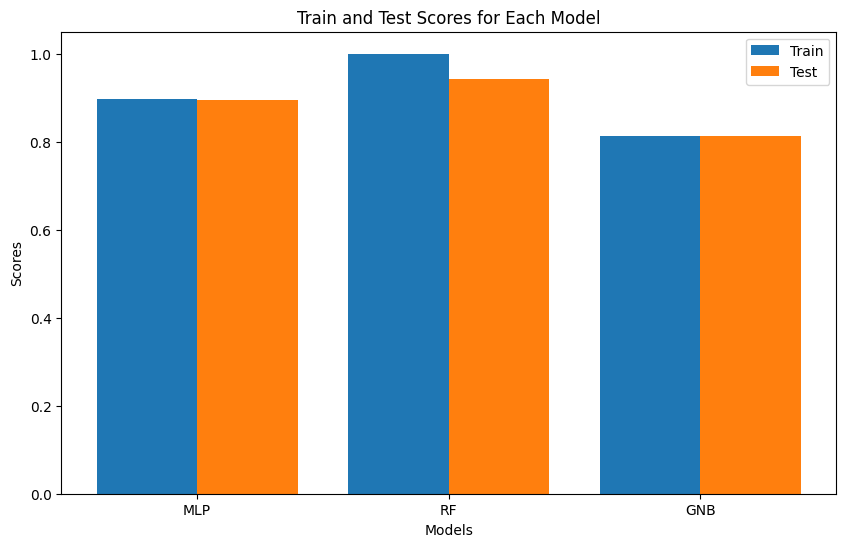

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
models=['MLP','RF','GNB']
accuracies=[mlp_accur,rf_accur,gnb_accur]
trainingscores=[mlp_score,rf_score,gnb_score]

# Plot
plt.figure(figsize=(10, 6))
x=np.arange(len(accuracies))

plt.bar(x-0.2, trainingscores,0.4, label='Train')
plt.bar(x+0.2, accuracies,0.4,label='Test')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores for Each Model')
plt.legend()
plt.show()

<h3>Τρίτη Προσέγγιση</h3>
Στο σημείο αυτό, δημιουργούμε ενα rolling window, το οποίο δημιουργεί ενα νέο σύνολο δεδομένων train and test. 

Συγκεκριμένα, δημιουργούμε ενα σύνολο δεδομένων το οποίο περνάει σαν είσοδο στο μοντέλο μας, τις τιμές του τρέχοντος δείγματος αλλα και τις τιμές 5 δειγμάτων πρίν και 5 μετά. Έτσι παρέχουμε στο μοντέλο πληροφορίες για τις προηγούμενες χρονικές στιγμές δίνοντας του την δυνατότητα να κάνει καλύτερες προβλέψεις

Ωστόσο, καθώς η υλοποιήση αυτή αυξάνει την υπολογιστική πολυπλοκότητα του προβλήματος, καταφεύγουμε στην λύση του sampling. Συγκεκριμένα, και επειδή είναι αρκετά συχνό το sampling στα δεδομένα που έχουμε επιλέγουμε να πάρουμε ενα δείγμα για καθε δείγμα του dataset.

Ωστόσο παρατηρώντας το describe, μετα απο αυτό παρατηρούμε οτι τα στατιστικά μεγέθη διατηρούν τις γενικότερες ιδιότητες τους.

<h4>Data Collection</h4>

In [1]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label  sample
0 -3.810360  0.165219 -0.663742 -0.919657 -0.759899  0.239633      6       0
1 -0.188988 -0.235452 -1.343093 -0.137463 -0.852652 -1.423640      6       1
2 -0.060000  0.008919 -0.876293  1.347957 -0.642281 -2.081678      6       2
3 -1.222393  0.028038 -0.460220  1.063477 -2.840740 -0.143171      6       3
4 -1.026113 -0.170239 -0.163068 -3.239610  0.924564 -0.720399      6       4

<h4>Data sampling/reduction</h4>

In [2]:
#lets reduce the data a little bit
reduced_df=tester_df.copy()
for i in range(len(testers)):
    reduced_df[i]=tester_df[i].iloc[::10,:] #every 10th row

for i in reduced_df:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40871 entries, 0 to 408700
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   back_x   40871 non-null  float64
 1   back_y   40871 non-null  float64
 2   back_z   40871 non-null  float64
 3   thigh_x  40871 non-null  float64
 4   thigh_y  40871 non-null  float64
 5   thigh_z  40871 non-null  float64
 6   label    40871 non-null  int64  
 7   sample   40871 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 2.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41899 entries, 0 to 418980
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   back_x   41899 non-null  float64
 1   back_y   41899 non-null  float64
 2   back_z   41899 non-null  float64
 3   thigh_x  41899 non-null  float64
 4   thigh_y  41899 non-null  float64
 5   thigh_z  41899 non-null  float64
 6   label    41899 non-null  int64  
 7   

In [3]:
for i in reduced_df:
    print(i.describe())

             back_x        back_y        back_z       thigh_x       thigh_y  \
count  40871.000000  40871.000000  40871.000000  40871.000000  40871.000000   
mean      -0.802054     -0.000138     -0.274922     -0.370225      0.143364   
std        0.238351      0.189131      0.441484      0.508832      0.215155   
min       -2.716781     -0.963181     -0.946786     -5.839687     -3.573247   
25%       -0.983639      0.001053     -0.702305     -0.953339      0.022517   
50%       -0.937172      0.033189     -0.277601     -0.277661      0.086219   
75%       -0.650586      0.075137      0.064664      0.069159      0.245993   
max        0.314188      2.519482      1.204374      3.236574      2.918555   

            thigh_z         label         sample  
count  40871.000000  40871.000000   40871.000000  
mean       0.616401     10.187297  209120.371633  
std        0.539064     20.319874  120666.907227  
min       -4.884791      1.000000       0.000000  
25%        0.141704      6.000000

<h4>Δημιουργία νέου Dataset</h4>

In [4]:
def create_lagged_features(df, n_lag=5):
    df_lagged = df.copy()
    
    for i in range(1, n_lag+1):
        for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
            df_lagged[f'{col}_prev_{i}'] = df[col].shift(i)
            df_lagged[f'{col}_next_{i}'] = df[col].shift(-i)
    
    df_lagged = df_lagged.dropna().reset_index(drop=True)
    return df_lagged

# Create lagged features
df_lagged = [create_lagged_features(reduced_df[i], n_lag=5) for i in range(len(testers))]

for i in df_lagged:
    print(i.info())
# Separate features and label


# features = df_lagged.drop(columns=['label','sample'])
# labels = df_lagged['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40861 entries, 0 to 40860
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   back_x          40861 non-null  float64
 1   back_y          40861 non-null  float64
 2   back_z          40861 non-null  float64
 3   thigh_x         40861 non-null  float64
 4   thigh_y         40861 non-null  float64
 5   thigh_z         40861 non-null  float64
 6   label           40861 non-null  int64  
 7   sample          40861 non-null  int64  
 8   back_x_prev_1   40861 non-null  float64
 9   back_x_next_1   40861 non-null  float64
 10  back_y_prev_1   40861 non-null  float64
 11  back_y_next_1   40861 non-null  float64
 12  back_z_prev_1   40861 non-null  float64
 13  back_z_next_1   40861 non-null  float64
 14  thigh_x_prev_1  40861 non-null  float64
 15  thigh_x_next_1  40861 non-null  float64
 16  thigh_y_prev_1  40861 non-null  float64
 17  thigh_y_next_1  40861 non-null 

In [5]:
#make them one df

unified_df=pd.concat(df_lagged,ignore_index=True)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=unified_df.drop(columns=['label'])
Y=unified_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h4>Neural Network Classifier</h4>

In [7]:
#3 minutes
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000,activation='tanh',random_state=42,early_stopping=True)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', early_stopping=True, max_iter=1000,
              random_state=42)

In [8]:
from sklearn.metrics import accuracy_score,classification_report
mlppredicts=mlp.predict(X_test)
mlp_report=classification_report(y_test,mlppredicts)
mlp_accur=accuracy_score(y_test,mlppredicts)
mlp_score=mlp.score(X_train,y_train)
print("MLP report:",mlp_report,"MLP accuracy:",mlp_accur,"MLP training:",mlp_score)

MLP report:               precision    recall  f1-score   support

           1       0.88      0.91      0.89     36142
           2       0.95      0.96      0.96      8699
           3       0.54      0.48      0.51      7607
           4       0.71      0.51      0.59      2308
           5       0.61      0.39      0.48      2013
           6       0.88      0.90      0.89     22185
           7       1.00      1.00      1.00     86852
           8       1.00      1.00      1.00     12835
          13       0.91      0.95      0.93     11945
          14       0.79      0.80      0.80      1657
         130       0.64      0.54      0.59      1290
         140       0.66      0.50      0.57       244

    accuracy                           0.93    193777
   macro avg       0.80      0.75      0.77    193777
weighted avg       0.92      0.93      0.92    193777
 MLP accuracy: 0.927003720771815 MLP training: 0.9345851441462363


<h4>Radnom Forest Classifier</h4>

In [9]:
#9mins
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=42)

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rfpredicts=rf.predict(X_test)
rf_report=classification_report(y_test,rfpredicts)
rf_accur=accuracy_score(y_test,rfpredicts)
rf_score=rf.score(X_train,y_train)
print("RF report:",rf_report,"RF accuracy:",rf_accur,"RF training:",rf_score)

RF report:               precision    recall  f1-score   support

           1       0.83      0.96      0.89     36142
           2       0.97      0.98      0.98      8699
           3       0.61      0.40      0.48      7607
           4       0.96      0.32      0.48      2308
           5       0.93      0.15      0.26      2013
           6       0.89      0.90      0.90     22185
           7       1.00      1.00      1.00     86852
           8       1.00      1.00      1.00     12835
          13       0.91      0.98      0.94     11945
          14       0.92      0.75      0.83      1657
         130       0.89      0.62      0.73      1290
         140       0.87      0.56      0.68       244

    accuracy                           0.93    193777
   macro avg       0.90      0.72      0.76    193777
weighted avg       0.93      0.93      0.92    193777
 RF accuracy: 0.9325048896411855 RF training: 1.0


<h4>Naive Bayes Classifier</h4>

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
predicts_gnb=gnb.predict(X_test)
gnb_report=classification_report(y_test,predicts_gnb)
gnb_accur=accuracy_score(y_test,predicts_gnb)
gnb_score=gnb.score(X_train,y_train)
print("GNB estim report: \n",gnb_report,'\n',"GNB estim accuracy:",gnb_accur,'\n',"GNB training:",gnb_score)

GNB estim report: 
               precision    recall  f1-score   support

           1       0.88      0.46      0.60     36142
           2       0.67      0.97      0.80      8699
           3       0.21      0.25      0.23      7607
           4       0.15      0.48      0.23      2308
           5       0.28      0.23      0.25      2013
           6       0.73      0.89      0.80     22185
           7       1.00      0.97      0.98     86852
           8       1.00      0.97      0.98     12835
          13       0.68      0.60      0.64     11945
          14       0.42      0.75      0.54      1657
         130       0.16      0.32      0.22      1290
         140       0.04      0.73      0.08       244

    accuracy                           0.79    193777
   macro avg       0.52      0.63      0.53    193777
weighted avg       0.85      0.79      0.81    193777
 
 GNB estim accuracy: 0.7945318587861304 
 GNB training: 0.7949816983489809


<h4>Compare the Classifiers</h4>

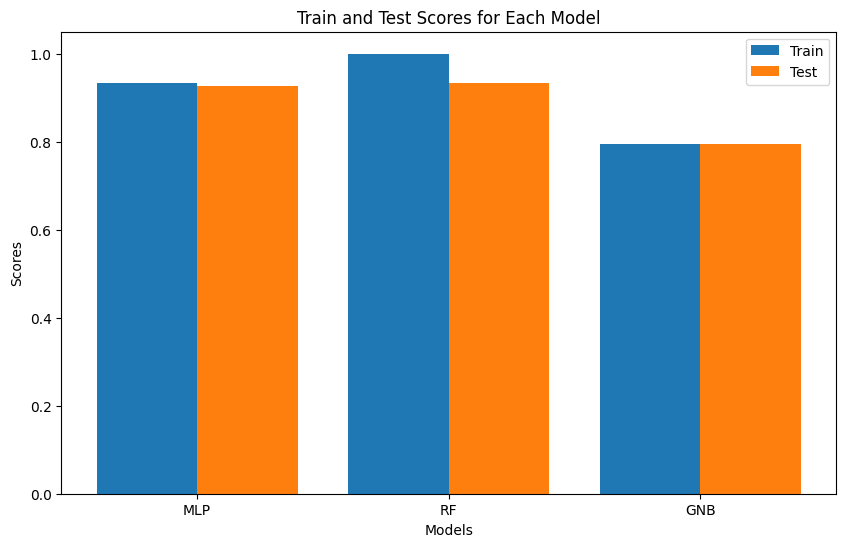

In [13]:
from matplotlib import pyplot as plt
import numpy as np
models=['MLP','RF','GNB']
accuracies=[mlp_accur,rf_accur,gnb_accur]
trainingscores=[mlp_score,rf_score,gnb_score]

# Plot
plt.figure(figsize=(10, 6))
x=np.arange(len(accuracies))

plt.bar(x-0.2, trainingscores,0.4, label='Train')
plt.bar(x+0.2, accuracies,0.4,label='Test')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores for Each Model')
plt.legend()
plt.show()

Σε αυτό το σημείο να αναφέρω ότι έγινε και ακριβώς η ίδια προσέγγιση χωρίς να κάνω sampling στα data, πράγμα που οδήγησε σε μοντέλα που ήθελαν ακόμα και 3 ώρες ωστε να εκπαιδευτούν. Ωστόσο η διαφορά στην απόδοση ήταν σχετικά μικρή (ελαφρώς βελτιωμένη η προσέγγιση με τα περισσότερα δεδομένα).
Για αυτόν τον λόγο αποφάσισα να μην προσθέσω την προσέγγιση αυτή στο τελικό παραδοτέο.

<h2>Ερώτημα 3</h2>
Στο ερώτημα αυτό, καλούμαστε να κάνουμε Clustering στους χρήστες με βάση τις δραστηριότητες τους.

<h3>Data Collection</h3>

In [4]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label  sample
0 -3.810360  0.165219 -0.663742 -0.919657 -0.759899  0.239633      6       0
1 -0.188988 -0.235452 -1.343093 -0.137463 -0.852652 -1.423640      6       1
2 -0.060000  0.008919 -0.876293  1.347957 -0.642281 -2.081678      6       2
3 -1.222393  0.028038 -0.460220  1.063477 -2.840740 -0.143171      6       3
4 -1.026113 -0.170239 -0.163068 -3.239610  0.924564 -0.720399      6       4

Δημιουργεία rolling window

In [5]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))


          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

Συνένωση των δεδομένων κάθε tester

In [6]:
unified_df=pd.concat(rolling_window,ignore_index=True)
unified_df.head()

back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
0 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632      6
1 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632      6
2 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632      6
3 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632      6
4 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632      6

Sampling, για διευκόλυνση στην εκτέλεση των προγραμμάτων

In [7]:
reduced_df = unified_df.iloc[::10]
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646133 entries, 0 to 6461320
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   646133 non-null  float64
 1   back_y   646133 non-null  float64
 2   back_z   646133 non-null  float64
 3   thigh_x  646133 non-null  float64
 4   thigh_y  646133 non-null  float64
 5   thigh_z  646133 non-null  float64
 6   label    646133 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 34.5 MB


Κρατάμε το label, για να αξιολογήσουμε το clustering αργότερα. Δεν το χρησιμοποιύμε στο clustering, καθώς θέλουμε unsupervised learning.

In [8]:
review=reduced_df['label']
reduced_df.drop(columns=['label'],inplace=True,errors='ignore')

C:\Users\gdste\AppData\Local\Temp\ipykernel_30424\3044613114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(columns=['label'],inplace=True,errors='ignore')


Κανονικοποιήση των δεδομένων.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=reduced_df.copy()
columns_to_normalize = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
scaled_df[columns_to_normalize]=scaler.fit_transform(scaled_df[columns_to_normalize])
scaled_df.head()

back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746

<h3>KMeans</h3>
Ο πρώτος αλγόριθμος συσταδοποιήσης που επιλέγω είναι ο Kmeans

<h4>Πρώτη προσέγγιση-Τυχαία επιλογή k</h4>
k=3.

Εκπαίδευση και εξαγωγή πίνακα

In [10]:
from sklearn.cluster import KMeans

scaled_df_k3=scaled_df.copy()
kmeans=KMeans(n_clusters=3,n_init=10)
kmeans.fit(scaled_df_k3)
scaled_df_k3['cluster']=kmeans.labels_
print(scaled_df_k3.head())
comparsion=pd.merge(scaled_df_k3,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)

c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  cluster
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095        0
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267        0
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262        0
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338        0
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746        0
cluster       0       1      2
review                        
1        116204    3495      4
2         24906    4221      9
3         25083     429      0
4          7359     254      0
5          6642      74      1
6         73327    1027      0
7          6315  283895     60
8         10305   21848  10735
13        36175    3221      0
14         5453     125      0
130        4057     122      0
140         773      14      0


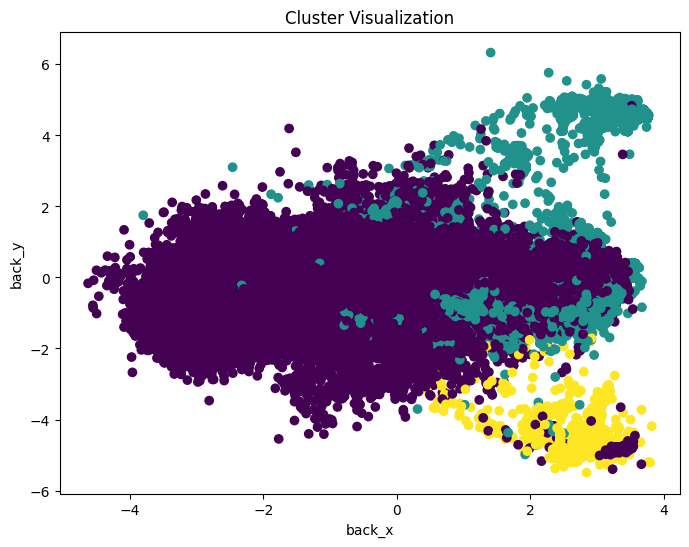

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k3['back_x'], scaled_df_k3['back_y'], c=scaled_df_k3['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()

In [13]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k3,kmeans.labels_,n_samples=100000,random_state=42)
score_k3=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 3 clusters:',score_k3)

Silhouette Score for 3 clusters: 0.3678821448688831


<h4>KElbow</h4>
Τώρα μέσω της μεθόδου KElbow, θα προσπαθήσουμε να προσδιορίσουμε την παράμετρο k, για τον αλγόριθμο Kmeans

c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


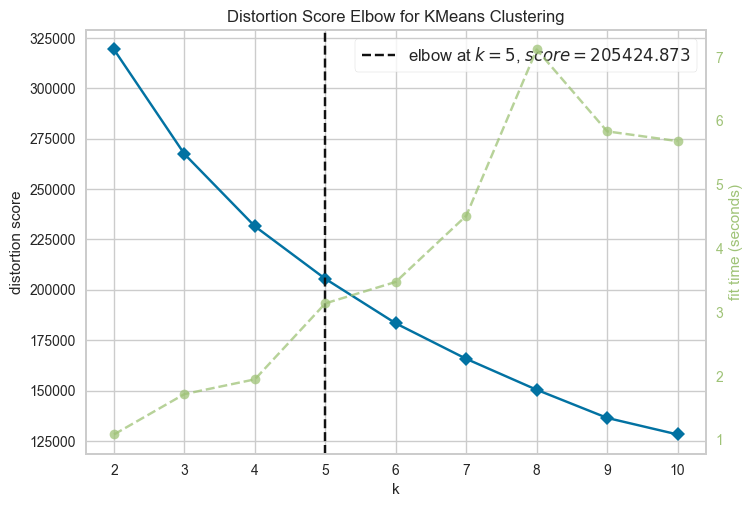

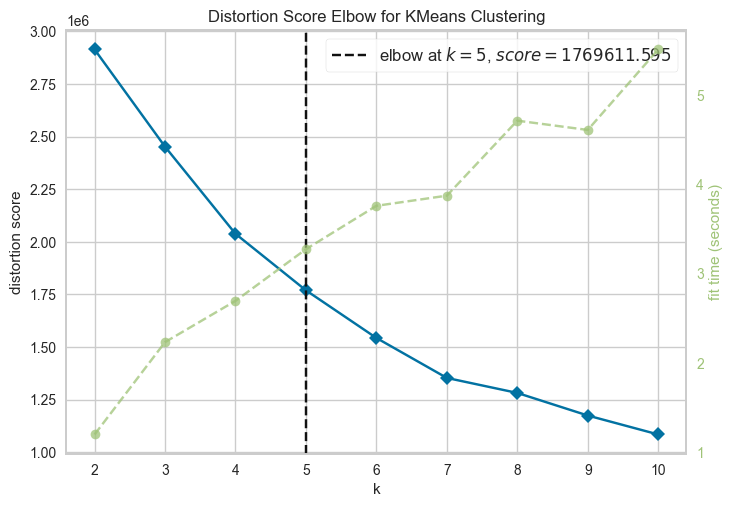

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(reduced_df)
sil_vis.show()

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(scaled_df)
sil_vis.show()

Η μέθοδος αυτή μας δείχνει το k=5, ωστόσο με βάση το παραπάνω διάγραμμα δεν μπορούμε να είμαστε σίγουροι οτι αυτό είναι το βέλτιστο.
Για αυτό το λόγο θα αξιοποιήσουμε και την μέθοδο του Silhouete Score.

<h4>Silhouette Score</h4>

Θα εκτελέσουμε τώρα τον αλγόριθμο Kmeans, υπολογίζοντας το silhouette score, για διάφορες τιμές της παραμέτρου k.

Silhouette Score for 2 clusters: 0.34488270593112824
Silhouette Score for 3 clusters: 0.36177019311093495
Silhouette Score for 4 clusters: 0.39091241852126024
Silhouette Score for 5 clusters: 0.3776635677693656
Silhouette Score for 6 clusters: 0.35923841403962586
Silhouette Score for 7 clusters: 0.2686248173064667
Silhouette Score for 8 clusters: 0.26911366491827515
Silhouette Score for 9 clusters: 0.2602124382981836
Silhouette Score for 10 clusters: 0.26051508024860837


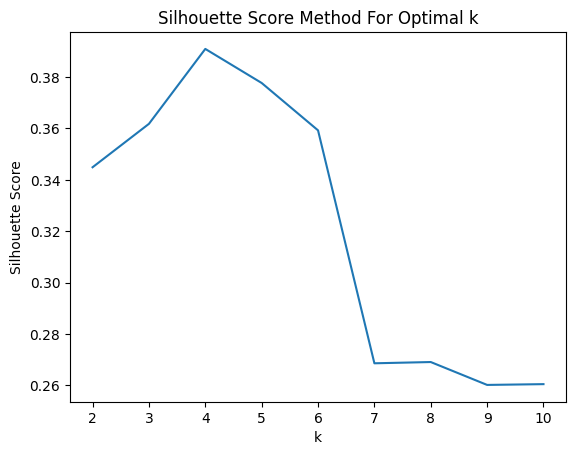

In [ ]:
# Silhouette Score Method
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.utils import resample
silhouette_scores = []

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df)
    sample_data,sample_labels=resample(scaled_df,kmeans.labels_,n_samples=100000,random_state=42)
    score=silhouette_score(sample_data,sample_labels)
    print('Silhouette Score for',i,'clusters:',score)
    silhouette_scores.append(score)

plt.title('Silhouette Score Method For Optimal k')
plt.plot(range(2,11),silhouette_scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()





Παρατηρούμε λοιπόν οτι αυτό μας δείχνει ως καλύτερη παράμετρο το k=4.
Αυτό δεν είναι σπάνιο, καθώς ο KElbow και το Silhouette Score αξιολογούν διαφορετικά πράγματα.
Ο Kelbow, κοιτάει εσωτερικά στο cluster, το άθροισμα των τετραγώνων και προσπαθεί να κάνει minimize. Επιπλέον οταν το γράφημα του Kelbow είναι όπως παραπάνω, η επιλογή της παραμέτρου k, μπορεί να είναι υποκειμενική.
Το silhouette score, αξιολογεί και τον διαχωρισμό μεταξύ των cluster, αλλα και την συνοχή μέσα σε αυτό.

Για αυτό εμείς τώρα, θα εκτελέσουμε τον Kmeans και με τις 2 τιμές των παραμέτρων, αξιολογώντας τα αποτελέσματα τους

<h4>KMeans(k=5)</h4>
Παίρνουμε την τιμή του k, που μας υπέδειξε το KElbow

In [ ]:
from sklearn.cluster import KMeans

scaled_df_k5=scaled_df.copy()
kmeans=KMeans(n_clusters=5,n_init=10)
kmeans.fit(scaled_df_k5)
scaled_df_k5['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k5,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)



c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster       0      1      2       3      4
review                                      
1          3873    493    137  115196      4
2          1277   3367   2259   22229      4
3           572     53     70   24817      0
4           466      3     32    7112      0
5           142      5      9    6560      1
6          1465    169     34   72686      0
7        222605  61643   4276    1688     58
8            75  11742  20328      18  10725
13         7869   1810     97   29620      0
14          133    261    166    5018      0
130         341     74     37    3727      0
140          50     15      0     722

<b>Σχολιασμός Αποτελεσμάτων</b>
Παρατηρούμε, ότι εδώ έχουμε όλες τις δραστηρίοτητες που περιλαμβάνουν κίνηση στο cluster 3.<br>
1: walking<br>
2: running<br>	
3: shuffling<br>
4: stairs (ascending)<br>	
5: stairs (descending)<br>	
6: standing<br>	

Η κλάση που ο χρήστης είναι καθιστός(7), παρατηρούμε ότι έχει τοποθετηθεί στο cluster 0.<br>

Η κλάση που ο χρήστης είναι ξαπλωμένος(8) στο cluster 2.<br>

Τέλος, οι τελευταίες 4 κλάσεις:<br>
13: cycling (sit)	<br>
14: cycling (stand)	<br>
130: cycling (sit, inactive)<br>
140: cycling (stand, inactive)<br>
<br>
, που ο χρήστης κάνει ποδήλατο τοποθετούνται κατα κύριο λογο στην κλάση των κινητικών δραστηριοτήτων (cluster 3).<br>
Ωστόσο, βλέπουμε μια τάση στην κλάση 13 και 130 όπου ο χρήστης κάνει ποδήλατο καθιστός, να τοποθετεί αρκετά δείγματα και εκεί (cluster 0), αντι για το 3ο cluster.
<br>
Τα cluster 1 και 4, παρόλο που έχουν κάποια δείγματα δεν μπορύμε να παρατηρήσουμε με βάση τα labels κάποιο μοτίβο.

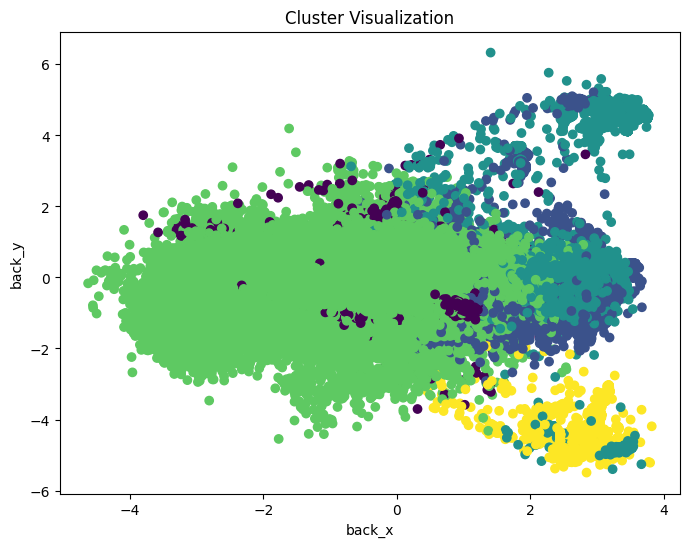

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k5['back_x'], scaled_df_k5['back_y'], c=scaled_df_k5['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k5,kmeans.labels_,n_samples=100000,random_state=42)
score_k5=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 5 clusters:',score_k5)

Silhouette Score for 5 clusters: 0.4631433086785492


<h4>KMeans(k=4)</h4>
Η τιμή που μας υπέδειξε το Silhouette Score

In [ ]:
from sklearn.cluster import KMeans

scaled_df_k4=scaled_df.copy()
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit(scaled_df_k4)
scaled_df_k4['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k4,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)


      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster       0      1       2      3
review                               
1          3567     24  116108      4
2          4028      3   25096      9
3           442     11   25059      0
4           249      0    7364      0
5            72      0    6644      1
6          1040      5   73309      0
7        283897      4    6311     58
8         11761  10100   10292  10735
13         3488      9   35899      0
14          113      0    5465      0
130         120      0    4059      0
140          14      0     773      0


<b>Σχολιασμός Αποτελεσμάτων</b>
Παρατηρούμε, ότι εδώ έχουμε όλες τις δραστηρίοτητες που περιλαμβάνουν κίνηση στο cluster 2.<br>
1: walking<br>
2: running<br>	
3: shuffling<br>
4: stairs (ascending)<br>	
5: stairs (descending)<br>	
6: standing<br>	

Η κλάση που ο χρήστης είναι καθιστός(7), παρατηρούμε ότι έχει τοποθετηθεί στο cluster 0, και αναγνωρίζεται σε μεγάλο ποσοστό.<br>

Η κλάση που ο χρήστης είναι ξαπλωμένος(8) το μοντέλο δυσκολέυται να την ξεχωρίσει σε αντίθεση με το παραπάνω παράδειγμα με 5 cluster, και κατανέμει περίπου ισόποσα τα στοιχεία του σε όλα τα cluster.<br>

Τέλος, οι τελευταίες 4 κλάσεις:<br>
13: cycling (sit)	<br>
14: cycling (stand)	<br>
130: cycling (sit, inactive)<br>
140: cycling (stand, inactive)<br>
<br>
, που ο χρήστης κάνει ποδήλατο τοποθετούνται κατα κύριο λογο στην κλάση των κινητικών δραστηριοτήτων (cluster 2).<br>
Ωστόσο, βλέπουμε μια τάση στην κλάση 13 και 130 όπου ο χρήστης κάνει ποδήλατο καθιστός, να τοποθετεί αρκετά δείγματα και εκεί (cluster 0), αντι για το cluster 2.
<br>
Τα cluster 1 και 3, παρόλο που έχουν κάποια δείγματα δεν μπορύμε να παρατηρήσουμε με βάση τα labels κάποιο μοτίβο.

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k4,kmeans.labels_,n_samples=100000,random_state=42)
score_k4=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 4 clusters:',score_k4)

Silhouette Score for 4 clusters: 0.4530486324736796


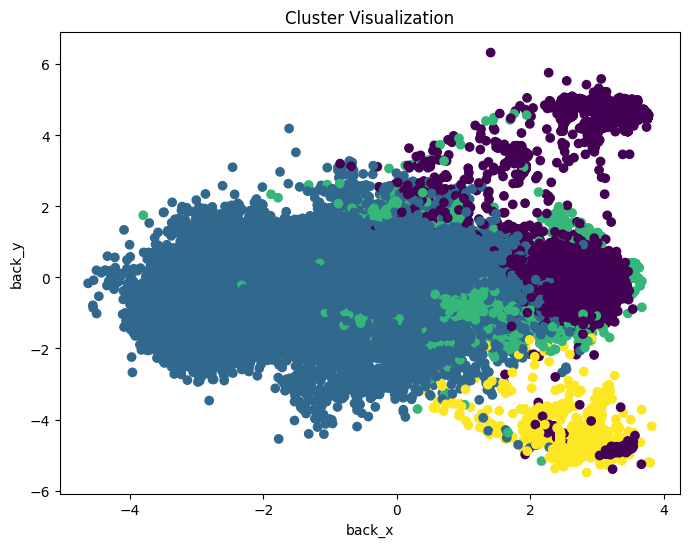

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k4['back_x'], scaled_df_k4['back_y'], c=scaled_df_k4['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()


<h4>KMeans-Extra (based on labels)</h4>

Θα δοκιμάσουμε τώρα, καθαρά για πειραματικούς λόγους, να εκμεταλευτούμε το γεγονός οτι γνωρίζουμε οτι τα δεδομένα μας κατηγοριοποιούνται σε 12 κατηγορίες και θα ορίσουμε στο kmeans k=12. Προφανώς μια τέτοια πληροφορία δεν θα μας είναι γνωστή σε ένα πρόβλημα συσταδοποιήσης, που αποτελέι πρόβλημα μη επιβλεπώμενης μάθησης. Ωστόσο έχει ενδιαφέρον να δούμε πώς λειτουργεί ο kmeans.

In [ ]:
from sklearn.cluster import KMeans

scaled_df_k12=scaled_df.copy()
kmeans=KMeans(n_clusters=12,n_init=10)
kmeans.fit(scaled_df_k12)
scaled_df_k12['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k12,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)

      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster      0      1      2      3      4     5     6      7      8      9   \
review                                                                         
1          1029      4   7748  61437    115     1    16     69  20965   1197   
2           725      3   1428   1861   2147     0     0    456  12475    159   
3           262      0   1941  20734      9     0     7     35    122    131   
4           256      0   1891   2742      0     0     0     36    524     14   
5            19      0   1205   3228      2     0     0      5    915      7   
6           450      0   3232  64235      3     0     5     28

Με μία πρώτη ματία δεν βλέπουμε κάποιο άξιο σχολιασμού αποτέλεσμα στα δεδομένα. Χάνεται πολύ πληροφορία και δεν διαχωρίζονται καλά τα δεδομένα, ούτε κάν σε ευρύτερες κατηγορίες όπως στα παραπάνω.

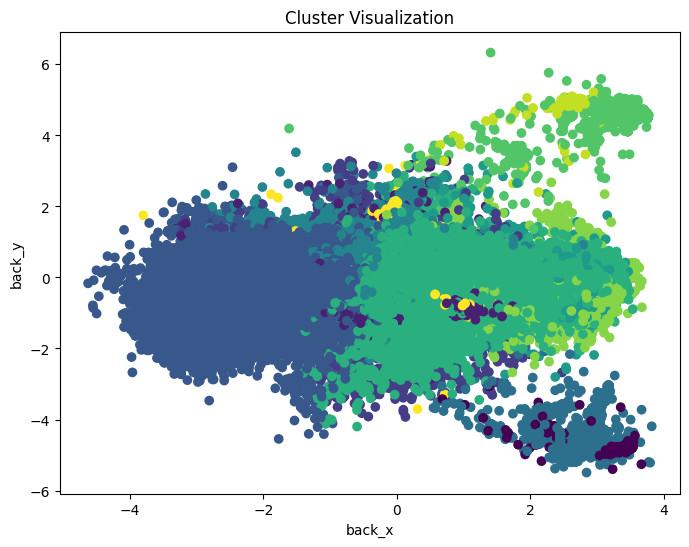

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k12['back_x'], scaled_df_k12['back_y'], c=scaled_df_k12['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k12,kmeans.labels_,n_samples=100000,random_state=42)
score_k12=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 12 clusters:',score_k12)

Silhouette Score for 12 clusters: 0.5385449328165981
